# Tesla stock price forecast

Should one buy, sell or hold Tesla stock? - Forecast stock price for the upcoming five days

Tesla plays a key role in the innovation industry and has undergone huge overall upward trend. It is clearly evident from the fact that the stock which was valued at about $\$7 $ in 2013 is currently valued at close to $\$800$. The stock has a high risk value of about $\$203$ during the 2013-2021 period.

I propose to use the yahoo finance platform to extract the daily Tesla stock price data during the period January, 2013 – October, 2021 period for my time-series analysis. For the current analysis, I will consider the Tesla stock closing price until Oct 1, 2021 and forecast for the period Oct 4 - Oct 8, 2021


### Table of contents:

* <a href = "#Descriptive Stats"> Descriptive Statistics </a>
* <a href = "#EDA"> Exploratory Data Analysis </a>
* <a href = "#stationarity"> Data Stationarity Analysis </a>
* <a href = "#ma"> Moving average modeling </a>
* <a href = "#ar"> Auto Regressive modeling </a>
* <a href = "#arma"> Auto Regressive Moving average modeling </a>
* <a href = "#arima"> Auto Regressive Integrated Moving average modeling </a>
* <a href = "#sarima"> Seasonal Auto Regressive Integrated Moving average modeling </a>
* <a href = "#prophet"> Facebooks's Prophet modeling </a>
* <a href = "#model_compare"> Models comparison </a>

## Importing the necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf
import datetime
import warnings
warnings.filterwarnings("ignore")
warnings.simplefilter('ignore')

Here, I am downloading the Tesla daily closing price during the period January 1, 2013 until October 1, 2021.

I am using the yahoo Finance API for the same by passing the Tesla stock Ticker - TSLA, start and end dates 

In [2]:
#defining the yahoo finance arguments
stock_ticker = 'TSLA'
start_date = datetime.datetime(2013,1,1)
end_date = datetime.datetime(2021, 10, 2) # Passing OCt 2, 2021 to obtain closing price until Oct 1, 2021
stock_close_price = yf.download(tickers=stock_ticker, start=start_date, end = end_date, interval="1d")["Close"]

[*********************100%***********************]  1 of 1 completed


In [3]:
stock_close_price

Date
2013-01-02      7.072000
2013-01-03      6.954000
2013-01-04      6.880000
2013-01-07      6.868000
2013-01-08      6.736000
                 ...    
2021-09-27    791.359985
2021-09-28    777.559998
2021-09-29    781.309998
2021-09-30    775.479980
2021-10-01    775.219971
Name: Close, Length: 2204, dtype: float64

In [4]:
# Validating of there are any null values returned by yahoo finance API
print("Count of records with null values: ", stock_close_price.isnull().sum())

Count of records with null values:  0


Next, I will perform descriptive statistics to gain an understand the data's statistical properties as they are related to the financial gain, risk etc. Also, these statistics helps me identify any outliers in the data considered

<a id = "Descriptive Stats"> </a>

## Descriptive statistics of Tesla closing price

In [5]:
print("Descriptive statistics of Tesla closing price:")
pd.DataFrame(stock_close_price.describe())

Descriptive statistics of Tesla closing price:


,Close
count,2204.000000
mean,131.799395
std,201.281091
min,6.582000
25%,42.110500
50%,51.467999
75%,69.934999
max,883.090027


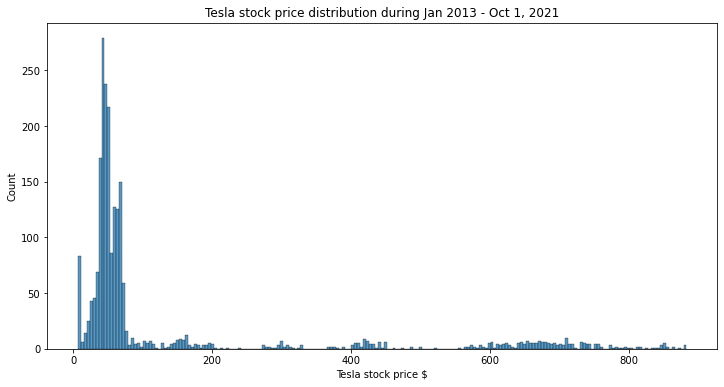

In [5]:
# Analysing the closing price distribution

plt.figure(figsize=(12,6))
sns.histplot(stock_close_price.values)
plt.title("Tesla stock price distribution during Jan 2013 - Oct 1, 2021")
plt.xlabel("Tesla stock price $")
plt.show()

* There are a total of 2204 records with stock price ranging from $\$6.58$ to $\$883$
* Tesla stock's mean closing price is $\$132$ and the median is $\$51.44. As the mean is greater than median, I conclude that the closing price is right-skewed

* As standard deviation is an indicator of the stock's risk,
from the above table, I observed that the Tesla stock is a high risk stock with a value of $\$203 $ 
* Additionally, noticed that the maximum value of $\$883$ is more than three standard deviations and less than four standard deviations from the mean indicating a potential outlier

Now, I will perform analysis to undertand the distribution of the Tesla closing price

<a id = "EDA"> </a>

## Exploratory data anlaysis of Tesla closing price

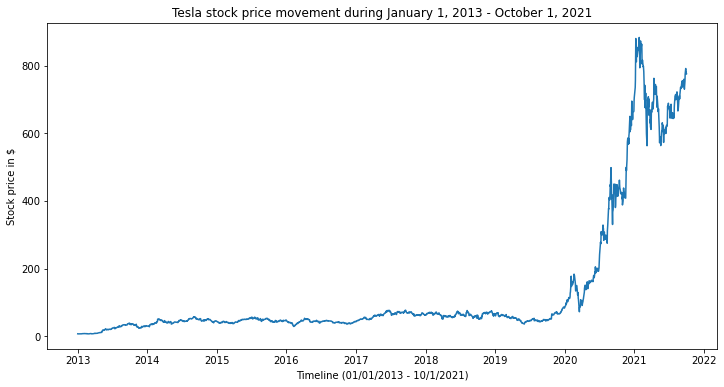

In [6]:
# Plotting a line plot to understand the TSLA stock movement

plt.figure(figsize=(12,6))
plt.plot(stock_close_price)
plt.title("Tesla stock price movement during January 1, 2013 - October 1, 2021")
plt.xlabel("Timeline (01/01/2013 - 10/1/2021)")
plt.ylabel("Stock price in $")
plt.show()


From the above lineplot, it is eveident that the Tesla had an overall upward trend especially, during 2020 - 10/2021 period.

As there is a very steep price variation in price in 2020, I am going to generate seperate line plots for the period prior to 2020 and another line plot for the values since 2020 to better understand the stock price pattern with time

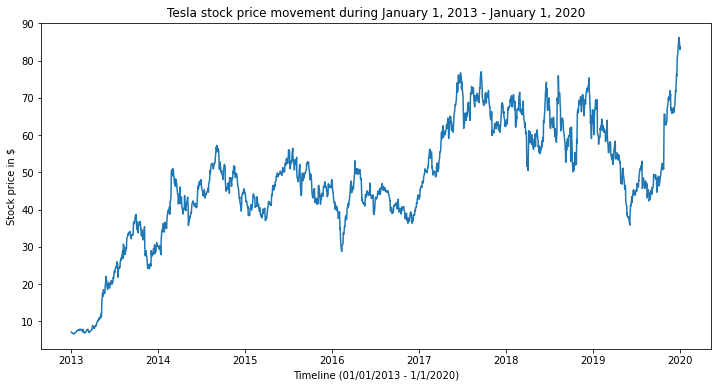

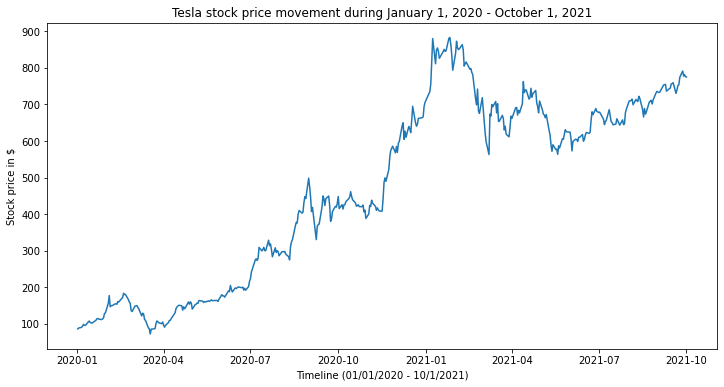

In [7]:
# Plotting a line plot to understand the TSLA stock movement (2013-2020)

plt.figure(figsize=(12,6))
plt.plot(stock_close_price[:'2020-01-01'])
plt.title("Tesla stock price movement during January 1, 2013 - January 1, 2020")
plt.xlabel("Timeline (01/01/2013 - 1/1/2020)")
plt.ylabel("Stock price in $")
plt.show()

# Plotting a line plot to understand the TSLA stock movement (2020-2021)

plt.figure(figsize=(12,6))
plt.plot(stock_close_price['2020-01-01':])
plt.title("Tesla stock price movement during January 1, 2020 - October 1, 2021")
plt.xlabel("Timeline (01/01/2020 - 10/1/2021)")
plt.ylabel("Stock price in $")
plt.show()

From the above graph, it is clear that Tesla has had a upward trend since 2013 (as the stock which was $\$7$ in 2013 is currently valued ~ $\$800 $). Additionally, noticed that the stock price upward steep during the last two years in much higher than the periovus years.  

Here, the upward trend observed indicates that the data is not stationary. Hence, I plan to further confirm the stationarity behavoir of the data by performing the auto-correlation analysis and augmented dicker fuller test

<a id="stationarity"> </a>

## Data Stationarity analysis

As a time series anlaysis holds good only when the data is stationary, I am going to check if the current data is stationary or not. Stationary data helps the time series based models, identify and capture the dependent structure in the time sereis data.

To check the stationarity of stock data, I will perform
* Auto-Correlation analysis
* Augmented Dicker fuller  test

### Auto correlation:

Auto correlation function (acf) calculates how a value depends on its previous value. Such an analysis helps one understand the serial dependency in a time series. 

A significant drop in the auto correlation values is an indicator of stationarity in the data.

To calculate the acf, I will utilise the plot_acf function from the Statmodels python library

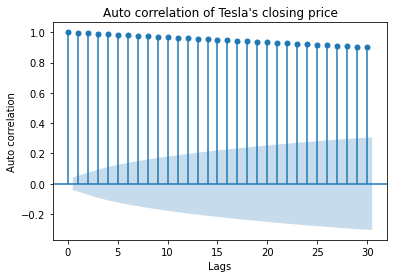

In [8]:
#Improting the acf function from statmodels library

import statsmodels.api as sm
sm.graphics.tsa.plot_acf(stock_close_price, lags= 30)
plt.xlabel("Lags")
plt.ylabel("Auto correlation")
plt.title("Auto correlation of Tesla's closing price")
plt.show()

From the auto correlation plot, it is clear that there is a very high correlation between a closing price at time t with its lagged values. Also, there is no significant drop in correlation when lags is high as 30. Thus, the acf plot supports that the data is not stationary.

Next, I will perform the statistical test - augmented dicker fuller test to confirm the stationarity property of the time series data

### Augmented Dicker fuller (adf) test

Null hypothesis states that the data is not stationary

Alternate hypothesis states that data is stationary

To perform the adf test, I will use the adfuller method from the Statmodels Python library

In [9]:
#importing the adf function from statsmodels library

from statsmodels.tsa.stattools import adfuller

adfuller_test_stats = adfuller(stock_close_price)[:2] #considering on the test statistic and p value results


In [10]:
print("Test statistic of adfuller test: ", adfuller_test_stats[0])
print("p value of adfuller test: ", adfuller_test_stats[1])

Test statistic of adfuller test:  1.4211569182530899
p value of adfuller test:  0.9972081665894222


From the high p value, I accept null hypothesis and conclude that the data is not stationary.

In order to perform a time series analysis, one of the main assumption is that the data should be stationary. Hence, I will perform first difference with an aim to acheive stationary data. 

Later, I will validate if first difference data is stationary

## Calculating first difference of Tesla closing price

In [11]:
#Calculating the first difference  of close price
stock_price_diff1 = stock_close_price.diff()
stock_price_diff1 = stock_price_diff1.dropna() #dropping the first row with null values

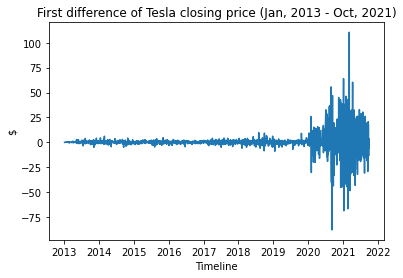

In [12]:
#Visualising the first difference data

plt.plot(stock_price_diff1)
plt.title("First difference of Tesla closing price (Jan, 2013 - Oct, 2021)")
plt.xlabel("Timeline")
plt.ylabel("$")
plt.show()

Data is said to be strongly stationary when the time series is identical after shifting for a time t. On the other hand, data is said to be weakly stationary when the mean is constant over time and variance is not a function of time

From the above line plot, as the data has approximately constant mean with variance not changing with time, I conclude that the first difference is weakly stationary. 

I will compute the auto-correlation and augmented dicker fuller test to confirm the stationarity property of the first difference data

#### AutoCorrelation of first difference data:

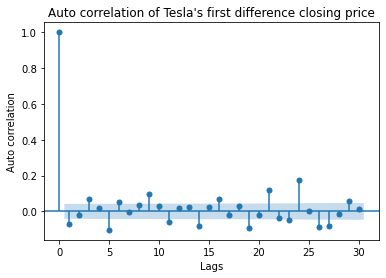

In [13]:
#Plotting the auto correlation
sm.graphics.tsa.plot_acf(stock_price_diff1, lags= 30)
plt.xlabel("Lags")
plt.ylabel("Auto correlation")
plt.title("Auto correlation of Tesla's first difference closing price")
plt.show()

The steep drop in auto correlation as lags increases, concludes that the data is stationary.

#### Ad fuller test on stock first difference data:

In [14]:
#importing the adf function from statsmodels library

from statsmodels.tsa.stattools import adfuller

adfuller_test_stats = adfuller(stock_price_diff1)[:2]

In [15]:
print("Test statistic of adfuller test: ", adfuller_test_stats[0])
print("p value of adfuller test: ", adfuller_test_stats[1])

Test statistic of adfuller test:  -9.090895993737153
p value of adfuller test:  3.826958087155876e-15


From the very low p value, I reject the null hypothesis of augemented dicker fuller test and hence conclude that the first difference closing price data is stationary.

Thus, I will use use the first difference stock price data to perform time series modelling techniques

<a id = "ma"> </a>

## Time series Modeling

Time series models are very useful models to perform predictive anlaytics on a serially correlated data. As stock data is highly serially corelated, it makes sense to perform time series modeling to identify patterns within data and help in forecasting the possible value of it in the upcoming days.

As part of time series modeling, I will construct a variety of time series models:

### Moving average:

Moving average modeling captures the time series pattern with the help of error terms.

First order moving average is defined as: 

$$ X_{t} = \alpha + \beta \epsilon_{t-1} + \epsilon_{t} $$

$ \epsilon_{t-1}, \epsilon_{t} $ are error terms at times t-1, t etc

As moving average is based on the correlation at time t with its successive previous values, auto correlation plots helps us identify the appropraite lags count that should be considered for effective modeling. Hence, generating an auto correlation plot to identify the suitable moving average lags.

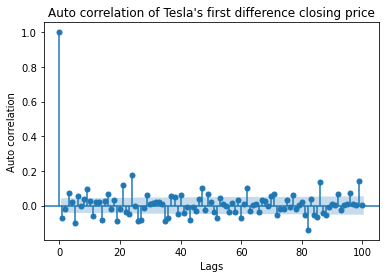

In [16]:
#Plotting the auto correlation
sm.graphics.tsa.plot_acf(stock_price_diff1, lags= 100)
plt.xlabel("Lags")
plt.ylabel("Auto correlation")
plt.title("Auto correlation of Tesla's first difference closing price")
plt.show()

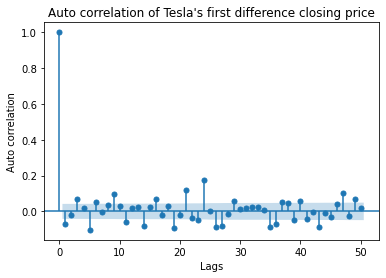

In [17]:
#Plotting the auto correlation
sm.graphics.tsa.plot_acf(stock_price_diff1, lags= 50)
plt.xlabel("Lags")
plt.ylabel("Auto correlation")
plt.title("Auto correlation of Tesla's first difference closing price")
plt.show()

From the above acf plot, the statistically significant spikes are identified at lags - 1,3 and 5 lags. Hence, considering the MA(5).

NOTE: Even though there are few additional statistically significant spikes at lags 9, 11 etc, I will only consider until lags=5 because, as the number of terms increases it creates a negative impact due to the possible overfitting and over complication of the modeling.

In order to calculate the moving average with lags=5, I will use the rolling method over the previous 5 values and perform a mean over it

In [18]:
moving_avg_tsla = stock_price_diff1.rolling(5).mean().dropna()

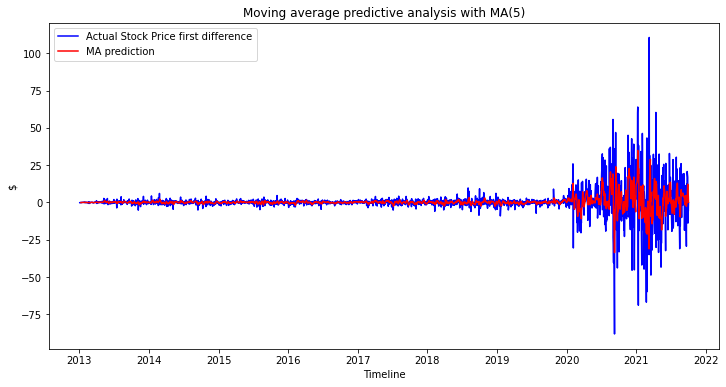

In [19]:
# Visualising the moving average values

plt.figure(figsize=(12,6))
plt.plot(stock_price_diff1.loc[start_date:end_date].index, stock_price_diff1.loc[start_date:end_date],
        label='Actual Stock Price first difference', c='b')
plt.plot(moving_avg_tsla.loc[start_date:end_date].index, moving_avg_tsla.loc[start_date:end_date],
        label='MA prediction', c='r')
plt.title('Moving average predictive analysis with MA(5)')
plt.xlabel('Timeline')
plt.ylabel('$')
plt.legend()
plt.show()

### Metrics to analyse the model performance

I plan to consider the error metrics as mean absolute error, root mean squared error to compare the various model performance.

**Mean Absolute Error (MAE)**: MAE measures the average magnitude of the errors in a set of predictions, without considering their direction. 

**Root mean squared error (RMSE)**: It is the square root of the average of squared differences between prediction and actual observation. As the errors are squared before they are averaged, the RMSE gives a relatively high weight to large errors ie., the RMSE should be preferred when large errors are particularly undesirable like in this particular store price forecasting. 

For analysing the model performance, I will calcualte the model performance over the last 25 days ie Aug-26-2021 to Sep-30-2021

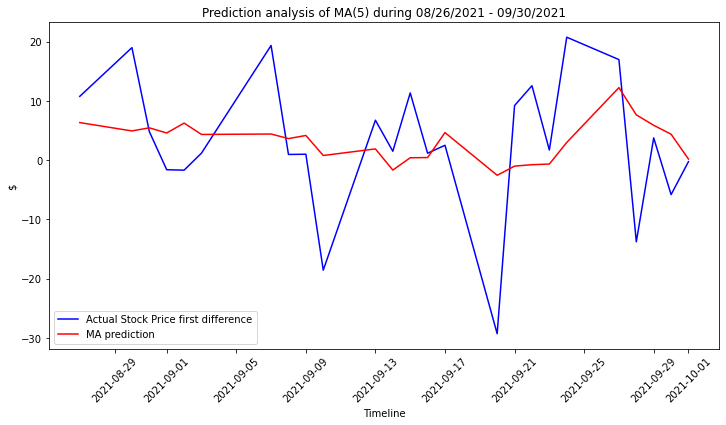

In [20]:
# Visualising the moving average values for last 25 days

plt.figure(figsize=(12,6))
plt.plot(stock_price_diff1[-25:].index, stock_price_diff1[-25:],
        label='Actual Stock Price first difference', c='b')
plt.plot(moving_avg_tsla[-25:].index, moving_avg_tsla[-25:],
        label='MA prediction', c='r')
plt.title('Prediction analysis of MA(5) during 08/26/2021 - 09/30/2021')
plt.xlabel('Timeline')
plt.xticks(rotation=45)
plt.ylabel('$')
plt.legend()
plt.show()

From the above visual, on comparing the predicted and actual values, I noticed that the MA(5) model is not capturing the higher fluctuations in data

I am creating a data frame to compare the prediction and the actual values, and calculate the model performance metrics

In [21]:
ma_5_model_test_results = pd.concat([stock_price_diff1[-25:],moving_avg_tsla[-25:]],axis=1).dropna()
ma_5_model_test_results.columns = ["Actual","Predicted"]

ma_5_model_test_results.head()

,Actual,Predicted
Date,,
2021-08-27,10.760010,6.331995
2021-08-30,18.989990,4.921997
2021-08-31,4.809998,5.445996
2021-09-01,-1.629944,4.578003
2021-09-02,-1.700012,6.246008


In [22]:
ma_5_model_test_results.tail()

,Actual,Predicted
Date,,
2021-09-27,16.969971,12.238000
2021-09-28,-13.799988,7.635999
2021-09-29,3.750000,5.873999
2021-09-30,-5.830017,4.367993
2021-10-01,-0.260010,0.165991


In [23]:
ma_5_model_test_results["Difference"] = ma_5_model_test_results[["Actual", "Predicted"]].apply(lambda x: x[0] - x[1],axis=1)
ma_5_model_test_results

,Actual,Predicted,Difference
Date,,,
2021-08-27,10.760010,6.331995,4.428015
2021-08-30,18.989990,4.921997,14.067993
2021-08-31,4.809998,5.445996,-0.635999
2021-09-01,-1.629944,4.578003,-6.207947
2021-09-02,-1.700012,6.246008,-7.946021
2021-09-03,1.179993,4.330005,-3.150012
2021-09-07,19.349976,4.402002,14.947974
2021-09-08,0.950012,3.630005,-2.679993
2021-09-09,0.989990,4.153992,-3.164001


In [24]:
ma_5_model_test_results["Difference"].mean()

-0.18575976562500032

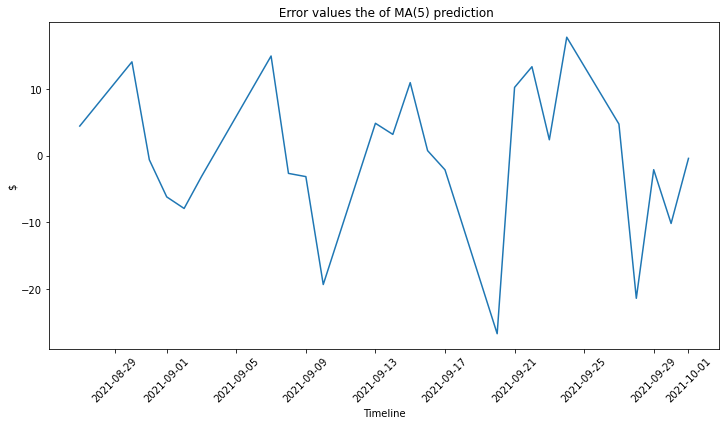

In [25]:
# Generating a line plot to understand the error term behaviour
plt.figure(figsize=(12,6))
plt.plot(ma_5_model_test_results["Difference"])
plt.title(' Error values the of MA(5) prediction')
plt.xlabel('Timeline')
plt.xticks(rotation=45)
plt.ylabel('$')
plt.show()

Noticed that the error term follows Random walk with mean varying around zero

To calculate the mean absolute error, root mean squared error I am utilising the functions from sklearn package

In [26]:
#Importing functions to calculate error
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [27]:
ma_mae = mean_absolute_error(ma_5_model_test_results["Actual"],ma_5_model_test_results["Predicted"])
print("MA model - Mean absolute error: ", round(ma_mae,2))

ma_rmse = np.sqrt(mean_squared_error(ma_5_model_test_results["Actual"],ma_5_model_test_results["Predicted"]))
print("MA model - Root mean squared error: ", round(ma_rmse,2))

MA model - Mean absolute error:  8.31
MA model - Root mean squared error:  10.98


### Forecasting the Tesla stock price during Oct 4, 2021 - Oct, 8 2021 via MA(5):

In [28]:
def ma_forecast_5(predicted):
    
    """
    Function calculates the moving average for the 5 day forecast period
    input: The predicted first difference values
    output: Moving average values for the upcoming 5 days
    """
    
    lt = list(predicted)

    for i in range(5):
        lt.append((np.mean(lt[-5:]))) #calculating the rolling mean

    return lt[-5:]

In [29]:
index_5 = list(ma_5_model_test_results.index)
index_5[-1]

Timestamp('2021-10-01 00:00:00')

Now, I am generating a time series to match the forecast values

In [30]:
z=0
for i in range(1,6):
    if index_5[-1].weekday() == 4: #If the day of week is Friday,adding an additional timedelta to avoid weekend dates
        z=2
    index_5.append((ma_5_model_test_results.index[-1])+datetime.timedelta(days=i+z))

In [31]:
index_5[-5:]

[Timestamp('2021-10-04 00:00:00'),
 Timestamp('2021-10-05 00:00:00'),
 Timestamp('2021-10-06 00:00:00'),
 Timestamp('2021-10-07 00:00:00'),
 Timestamp('2021-10-08 00:00:00')]

Creating a dataframe to store the forecasted Tesla stock price:

In [32]:
ma_5_model_forecast = ma_5_model_test_results[["Predicted"]].apply(ma_forecast_5)
ma_5_model_forecast.index = index_5[-5:]
ma_5_model_forecast.columns = ["Forecast_diff1"]
ma_5_model_forecast

,Forecast_diff1
2021-10-04,6.056396
2021-10-05,4.820076
2021-10-06,4.256891
2021-10-07,3.933470
2021-10-08,3.846565


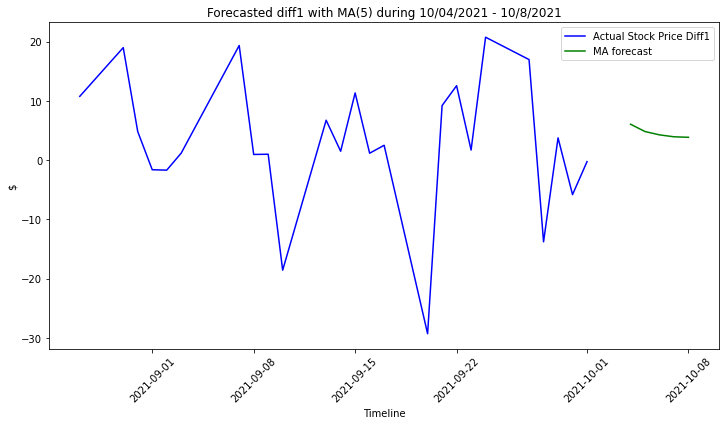

In [33]:
# Visualising the moving average values

plt.figure(figsize=(12,6))
plt.plot(stock_price_diff1[-25:].index, stock_price_diff1[-25:],
        label='Actual Stock Price Diff1', c='b')
plt.plot(ma_5_model_forecast.index, ma_5_model_forecast["Forecast_diff1"],
        label='MA forecast', c='g')
plt.title('Forecasted diff1 with MA(5) during 10/04/2021 - 10/8/2021')
plt.xlabel('Timeline')
plt.xticks(rotation=45)
plt.ylabel('$')
plt.legend()
plt.show()

From the above visual, I noticed that the forecasted price difference 1 is not capturing well the fluctuations in the stock price

Here, I am creating a function to calculate the forecasted Tesla stock price based on the first difference forecasted values:

In [34]:
def stock_forecast_price(diff1,last_close_price):
    
    """
    The function calculates the forecasted stock price
    input: The forecasted first difference values, the last known stock price prior to forecast
    output: returns a list of stock price values during the forecast period
    """
    diff1_lt = list(diff1)
    last_stock_price = last_close_price
    
    forecasted_stock_price = []
    
    forecasted_stock_price.append(last_stock_price + diff1_lt[0])
    for i in range(1,len(diff1)):
        
        forecasted_stock_price.append(forecasted_stock_price[-1]+diff1_lt[i])
        
    return forecasted_stock_price
    

Now, I am storing the forecasted stock price in the dataframe:

In [35]:
ma_5_model_forecast["Forecast"] = stock_forecast_price(ma_5_model_forecast["Forecast_diff1"],stock_close_price[-1])
ma_5_model_forecast

,Forecast_diff1,Forecast
2021-10-04,6.056396,781.276367
2021-10-05,4.820076,786.096443
2021-10-06,4.256891,790.353334
2021-10-07,3.933470,794.286804
2021-10-08,3.846565,798.133368


Creating a visualisation to showcase the Tesla stock price for the upcoming week (10/4 - 10/8, 2021):

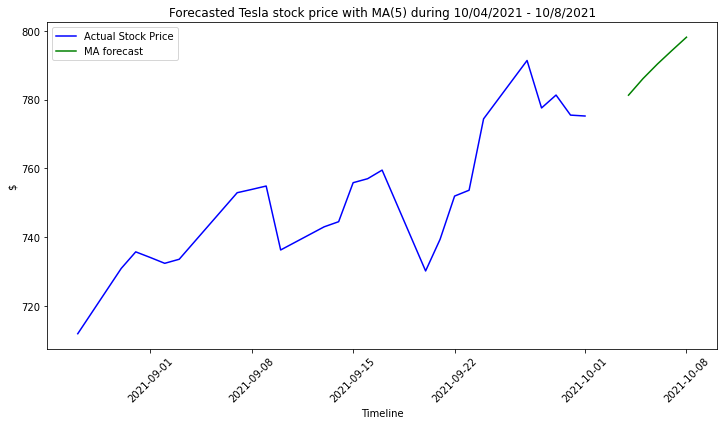

In [36]:
# Visualising the moving average values 

plt.figure(figsize=(12,6))
plt.plot(stock_close_price[-25:].index, stock_close_price[-25:],
        label='Actual Stock Price', c='b')
plt.plot(ma_5_model_forecast.index, ma_5_model_forecast["Forecast"],
        label='MA forecast', c='g')
plt.title('Forecasted Tesla stock price with MA(5) during 10/04/2021 - 10/8/2021')
plt.xlabel('Timeline')
plt.xticks(rotation=45)
plt.ylabel('$')
plt.legend()
plt.show()

Here, in the above line plot, blue line indicates the actual stock price and green line indicates the forecasted stock price for 10/04 - 10/08, 2021 period.

Based on the line plot, I conclude that the MA(5) model is highly influenced bu the overall upward trend and thus forecasted with a steep upward slope.

<a id = "ar"> </a>

### Auto regressive model

Here, the time series modeling is performed by auto regressing the lagged values.

AR(1) is:

\begin{equation} X_{t} = \alpha + \beta X_{t-1} + \epsilon \end{equation}


As in regression analysis, the features should not be correlated, there is a need to identify what is the individual affect of each lagged term. In order to acheive it, we should calculate the partial auto correlation as it finds the correlations of the residuals after removing the effect of already explained lags from the earlier lags.

In order to identify the appropriate lag value, I will calculate the partial auto correlation using the function available in stat models python library:

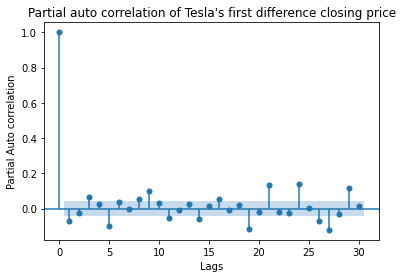

In [37]:
#Plotting the partial auto correlation values

sm.graphics.tsa.plot_pacf(stock_price_diff1,lags=30)
plt.xlabel("Lags")
plt.ylabel("Partial Auto correlation")
plt.title("Partial auto correlation of Tesla's first difference closing price")
plt.show()

From the pacf graph, noticed statistically significant spikes at lags 1,3 and 5. Hence, considering 5 lags as its the largest spike.

NOTE: Even though there are few additional statistically significant spikes at lags 9 etc, I will only consider until lags=5 because, as the number of terms increases it creates a negative impact due to the possible overfitting and over complication of the modeling.

I will use the AutoReg model from the statsmodels Python library to perform my Auto regression analysis:

In [38]:
#Importing the AutoReg function from statsmodels, ar_model

from statsmodels.tsa.ar_model import AutoReg

In [39]:
#Creating the auto regressive model

ar_tsla = AutoReg(stock_price_diff1, lags=5)  #Defining lags as 5
ar_fitted_tsla = ar_tsla.fit() #fitting the model

/Users/Monika/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:216: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


Generating predictions for the last 25 days, based on the above created AR model:

In [40]:
ar_predictions_tsla= ar_fitted_tsla.predict(start=len(stock_price_diff1[:-25]), 
                                   end=len(stock_price_diff1[:-25]) +
                                            len(stock_price_diff1[-25:])-1,dynamic=False)

In [41]:
ar_predictions_tsla

Date
2021-08-27    1.068601
2021-08-30   -2.572189
2021-08-31   -1.901077
2021-09-01    0.066146
2021-09-02    2.949208
2021-09-03    0.187387
2021-09-07   -1.563364
2021-09-08   -1.587572
2021-09-09    0.278707
2021-09-10    1.814855
2021-09-13    2.004189
2021-09-14   -1.671418
2021-09-15   -1.147180
2021-09-16   -0.449672
2021-09-17    2.240306
2021-09-20    0.335815
2021-09-21    2.535068
2021-09-22   -0.808452
2021-09-23   -2.658985
2021-09-24   -0.134840
2021-09-27    2.884778
2021-09-28   -1.570302
2021-09-29    1.327228
2021-09-30    1.728131
2021-10-01   -1.896474
dtype: float64

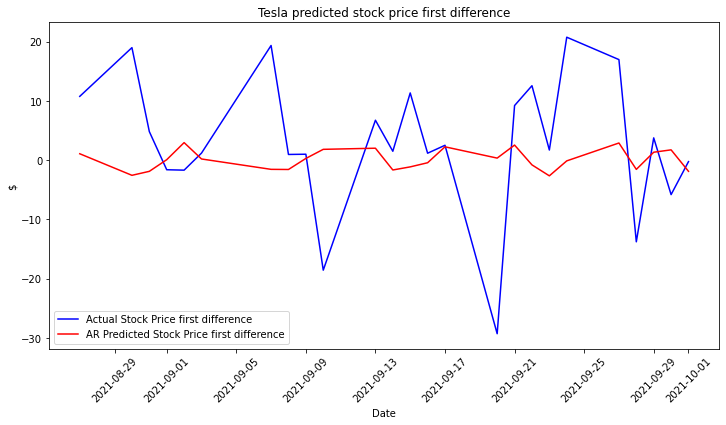

In [42]:
plt.figure(figsize=(12,6))
plt.plot(stock_price_diff1[-25:], label='Actual Stock Price first difference',c='b')
plt.plot(ar_predictions_tsla,c='r',label='AR Predicted Stock Price first difference')
plt.title('Tesla predicted stock price first difference')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.ylabel('$')
plt.legend()
plt.show()

From the above visual, on comparing the predicted and actual values, I noticed that the AR model is slightly capturing the fluctuations in data

I am creating a data frame to compare the prediction and the actual values,and calculate the model performance metrics

In [43]:
ar_5_model_test_results = pd.concat([stock_price_diff1[-25:],ar_predictions_tsla[-25:]],axis=1).dropna()
ar_5_model_test_results.columns = ["Actual","Predicted"]

ar_5_model_test_results.head()

,Actual,Predicted
Date,,
2021-08-27,10.760010,1.068601
2021-08-30,18.989990,-2.572189
2021-08-31,4.809998,-1.901077
2021-09-01,-1.629944,0.066146
2021-09-02,-1.700012,2.949208


In [44]:
ar_5_model_test_results.tail()

,Actual,Predicted
Date,,
2021-09-27,16.969971,2.884778
2021-09-28,-13.799988,-1.570302
2021-09-29,3.750000,1.327228
2021-09-30,-5.830017,1.728131
2021-10-01,-0.260010,-1.896474


In [45]:
ar_5_model_test_results["Difference"] = ar_5_model_test_results[["Actual", "Predicted"]].apply(lambda x: x[0] - x[1],axis=1)
ar_5_model_test_results

,Actual,Predicted,Difference
Date,,,
2021-08-27,10.760010,1.068601,9.691408
2021-08-30,18.989990,-2.572189,21.562179
2021-08-31,4.809998,-1.901077,6.711074
2021-09-01,-1.629944,0.066146,-1.696090
2021-09-02,-1.700012,2.949208,-4.649220
2021-09-03,1.179993,0.187387,0.992606
2021-09-07,19.349976,-1.563364,20.913339
2021-09-08,0.950012,-1.587572,2.537585
2021-09-09,0.989990,0.278707,0.711283


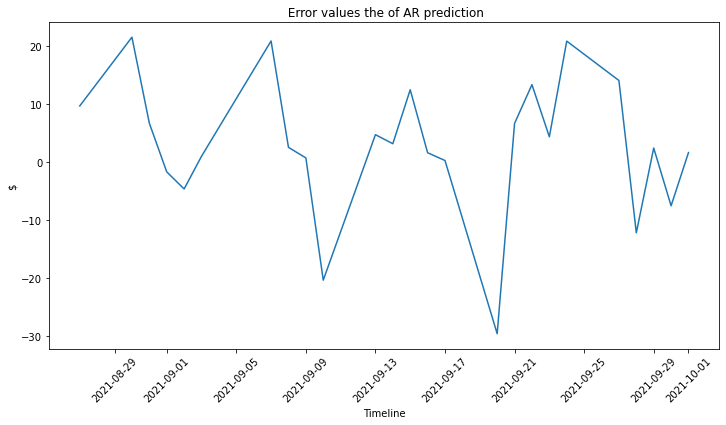

In [46]:
# Generating a line plot to understand the error term behaviour
plt.figure(figsize=(12,6))
plt.plot(ar_5_model_test_results["Difference"])
plt.title(' Error values the of AR prediction')
plt.xlabel('Timeline')
plt.xticks(rotation=45)
plt.ylabel('$')
plt.show()

Noticed that the error term follows Random walk with mean varying around zero

To calculate the mean absolute error, root mean squared error I am utilising the functions from sklearn package

In [47]:
#Importing functions to calculate error
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [48]:
ar_mae = mean_absolute_error(ar_5_model_test_results["Actual"],ar_5_model_test_results["Predicted"])
print("AR model - Mean absolute error: ", round(ar_mae,2))

ar_rmse = np.sqrt(mean_squared_error(ar_5_model_test_results["Actual"],ar_5_model_test_results["Predicted"]))
print("AR model - Root mean squared error: ", round(ar_rmse,2))

AR model - Mean absolute error:  9.0
AR model - Root mean squared error:  12.09


### Forecasting the Tesla stock price during Oct 4, 2021 - Oct, 8 2021 via AR:

Now, I am forecasting for an additional five days after October 1, 2021

Creating a dataframe to store the forecasted Tesla stock price:

In [49]:
ar_5_model_forecast = ar_fitted_tsla.predict(start=len(stock_price_diff1[:-25]), 
                                   end=len(stock_price_diff1[:-25])+
                                              len(stock_price_diff1[-25:])-1+5,dynamic=False)

ar_5_model_forecast = pd.DataFrame(ar_5_model_forecast[-5:])
ar_5_model_forecast.index = index_5[-5:]


ar_5_model_forecast.columns = ["Forecast_diff1"]
ar_5_model_forecast

/Users/Monika/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:580: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


,Forecast_diff1
2021-10-04,-1.241773
2021-10-05,1.514410
2021-10-06,-0.219478
2021-10-07,0.862673
2021-10-08,0.427198


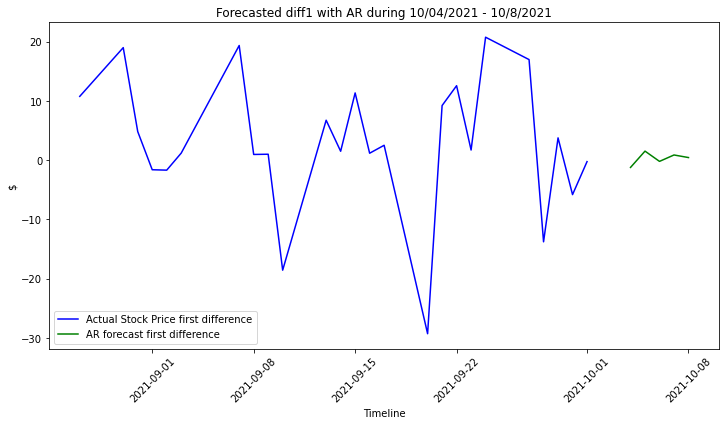

In [51]:
# Visualising the auto regression values

plt.figure(figsize=(12,6))
plt.plot(stock_price_diff1[-25:].index, stock_price_diff1[-25:],
        label='Actual Stock Price first difference', c='b')
plt.plot(ar_5_model_forecast.index, ar_5_model_forecast["Forecast_diff1"],
        label='AR forecast first difference', c='g')
plt.title('Forecasted diff1 with AR during 10/04/2021 - 10/8/2021')
plt.xlabel('Timeline')
plt.xticks(rotation=45)
plt.ylabel('$')
plt.legend()
plt.show()

Now, I am storing the forecasted stock price in the dataframe:

In [52]:
ar_5_model_forecast["Forecast"] = stock_forecast_price(ar_5_model_forecast["Forecast_diff1"],stock_close_price[-1])
ar_5_model_forecast

,Forecast_diff1,Forecast
2021-10-04,-1.241773,773.978198
2021-10-05,1.514410,775.492608
2021-10-06,-0.219478,775.273130
2021-10-07,0.862673,776.135803
2021-10-08,0.427198,776.563001


Creating a visualisation to showcase the Tesla stock price for the upcoming week (10/4 - 10/8, 2021):

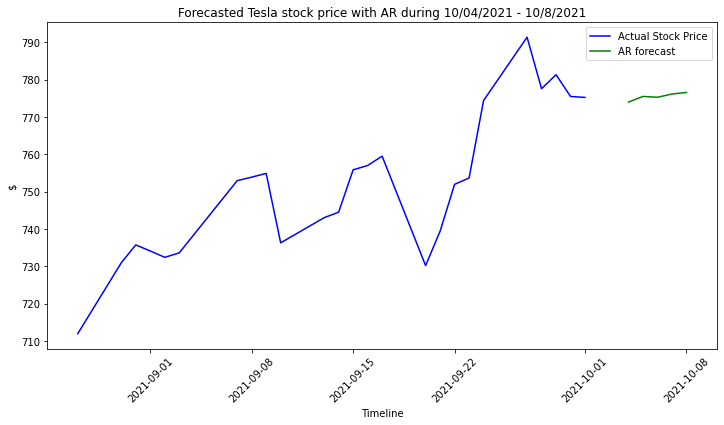

In [53]:
# Visualising the auto regression forecast

plt.figure(figsize=(12,6))
plt.plot(stock_close_price[-25:].index, stock_close_price[-25:],
        label='Actual Stock Price', c='b')
plt.plot(ar_5_model_forecast.index, ar_5_model_forecast["Forecast"],
        label='AR forecast', c='g')
plt.title('Forecasted Tesla stock price with AR during 10/04/2021 - 10/8/2021')
plt.xlabel('Timeline')
plt.xticks(rotation=45)
plt.ylabel('$')
plt.legend()
plt.show()

Here, in the above line plot, blue line indicates the actual stock price and green line indicates the forecasted stock price for 10/04 - 10/08, 2021 period.

Based on the line plot, I conclude that the AR model is not highly influenced by the overall upward trend.

<a id="arma"> </a>

## Auto Regressive Moving Average
ARMA model is built by utilising the error terms and also regressing over past values ie., it utilises both the auto regressive and moving average aspects to make forecast . Hence, I have to define two parameters - order of AR component p and order of MA component q.

The ARMA model takes the following form when p and q is 1:

\begin{equation} X_{t} = \alpha + \beta_{1} X_{t-1} + \beta_{2} \epsilon_{t-1} + \epsilon_{t} \end{equation}

In [54]:
#Import ARMA model

from statsmodels.tsa.arima_model import ARMA
import itertools #using iter tools package to create all possible combinations between two parameters

In ARMA model, as the model tries to find the best moving average order and auto regression lags, I am going to create all possible combinations and identify the model with least Akaike information criterion (AIC) value.
AIC is a mathematical method for evaluating how well a model fits the data it was generated from. In statistics, AIC is used to compare different possible models and determine which one is the best fit for the data. AIC is calculated from:
1] the number of independent variables used to build the model.
2] the maximum likelihood estimate of the model.

I am considering 1-5 values for both p and q terms

In [55]:
p = range(6)
q = range(6)
pq = list(itertools.product(p,q))
print(pq)

[(0, 0), (0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (1, 0), (1, 1), (1, 2), (1, 3), (1, 4), (1, 5), (2, 0), (2, 1), (2, 2), (2, 3), (2, 4), (2, 5), (3, 0), (3, 1), (3, 2), (3, 3), (3, 4), (3, 5), (4, 0), (4, 1), (4, 2), (4, 3), (4, 4), (4, 5), (5, 0), (5, 1), (5, 2), (5, 3), (5, 4), (5, 5)]


#### Identifing the best p, q values with lowest AIC

In [56]:
arma_results_tsla=[] #List to store AIC values
arma_paramaters_lt = [] #List to store the parameters

# Using a try catch block to ensure the program handles any possible error and 
# moves to the next parameter pair without issues
for param_set in pq:
    try:
        arma_tsla=ARMA(stock_price_diff1.values,order=param_set)
        arma_fitted_tsla = arma_tsla.fit()
        arma_results_tsla.append(arma_fitted_tsla.aic)
        arma_paramaters_lt.append(param_set)
        print('=='*30)
        print('ARMA parameters are:{} & AIC value is:{}'.format(param_set,  arma_fitted_tsla.aic))
    except:
        continue


print('**'*30)
print('The Lowest AIC score is {:.4f} and the corresponding parameters are {}'.\
      format(min(arma_results_tsla),
             arma_paramaters_lt[arma_results_tsla.index(min(arma_results_tsla))]))

/Users/Monika/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


ARMA parameters are:(0, 0) & AIC value is:15798.286306261594
ARMA parameters are:(0, 1) & AIC value is:15789.255664025837
ARMA parameters are:(0, 2) & AIC value is:15791.039416101044
ARMA parameters are:(0, 3) & AIC value is:15782.732308740095
ARMA parameters are:(0, 4) & AIC value is:15784.697541612772
ARMA parameters are:(0, 5) & AIC value is:15761.240789772011
ARMA parameters are:(1, 0) & AIC value is:15789.639113541052
ARMA parameters are:(1, 1) & AIC value is:15791.185759549604
ARMA parameters are:(1, 2) & AIC value is:15791.75793896971
ARMA parameters are:(1, 3) & AIC value is:15784.723498385429
ARMA parameters are:(1, 4) & AIC value is:15774.309515274173
ARMA parameters are:(1, 5) & AIC value is:15760.456968817063
ARMA parameters are:(2, 0) & AIC value is:15790.268481126965
ARMA parameters are:(2, 1) & AIC value is:15790.430287844185
ARMA parameters are:(2, 2) & AIC value is:15759.637733918222
ARMA parameters are:(2, 3) & AIC value is:15775.35547991821
ARMA parameters are:(2, 4)

### Creating the best identified ARMA model

Based on the above values, I am going to create a ARMA model with the values of (5,4)
ie, AR of 5 and MA of order 4

In [57]:
arma_tsla = ARMA(stock_price_diff1,order=(5, 4))
arma_fitted_tsla= arma_tsla.fit()

/Users/Monika/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:216: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


In [58]:
arma_predictions_tsla= arma_fitted_tsla.predict(start=len(stock_price_diff1[:-25]), 
                                   end=len(stock_price_diff1[:-25])
                                                +len(stock_price_diff1[-25:])-1,dynamic=False)

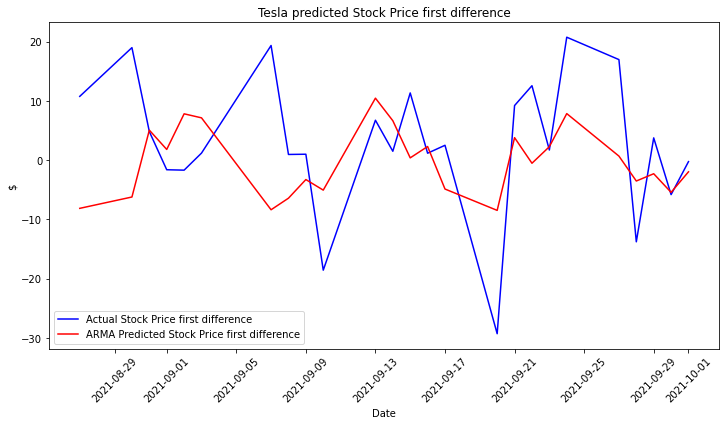

In [89]:
plt.figure(figsize=(12,6))
plt.plot(stock_price_diff1[-25:], label='Actual Stock Price first difference',c='b')
plt.plot(arma_predictions_tsla,c='r',label='ARMA Predicted Stock Price first difference')
plt.title('Tesla predicted Stock Price first difference')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.ylabel('$')
plt.legend()
plt.show()

From the above visual, on comparing the predicted and actual values, I noticed that the ARMA model is slightly capturing the fluctuations in data

I am creating a data frame to compare the prediction and the actual values,and calculate the model performance metrics

In [60]:
arma_5_model_test_results = pd.concat([stock_price_diff1[-25:],arma_predictions_tsla[-25:]],axis=1).dropna()
arma_5_model_test_results.columns = ["Actual","Predicted"]

arma_5_model_test_results.head()

,Actual,Predicted
Date,,
2021-08-27,10.760010,-8.149257
2021-08-30,18.989990,-6.234003
2021-08-31,4.809998,5.054540
2021-09-01,-1.629944,1.797611
2021-09-02,-1.700012,7.812551


In [61]:
arma_5_model_test_results.tail()

,Actual,Predicted
Date,,
2021-09-27,16.969971,0.674978
2021-09-28,-13.799988,-3.533459
2021-09-29,3.750000,-2.305591
2021-09-30,-5.830017,-5.447950
2021-10-01,-0.260010,-1.981227


In [62]:
arma_5_model_test_results["Difference"] = arma_5_model_test_results[["Actual", "Predicted"]].apply(lambda x: x[0] - x[1],axis=1)
arma_5_model_test_results

,Actual,Predicted,Difference
Date,,,
2021-08-27,10.760010,-8.149257,18.909267
2021-08-30,18.989990,-6.234003,25.223993
2021-08-31,4.809998,5.054540,-0.244542
2021-09-01,-1.629944,1.797611,-3.427555
2021-09-02,-1.700012,7.812551,-9.512563
2021-09-03,1.179993,7.132456,-5.952464
2021-09-07,19.349976,-8.387966,27.737942
2021-09-08,0.950012,-6.434452,7.384464
2021-09-09,0.989990,-3.288391,4.278381


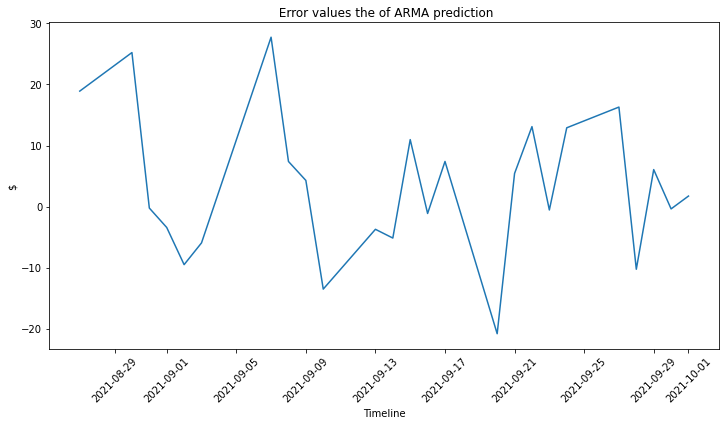

In [63]:
# Generating a line plot to understand the error term behaviour
plt.figure(figsize=(12,6))
plt.plot(arma_5_model_test_results["Difference"])
plt.title(' Error values the of ARMA prediction')
plt.xlabel('Timeline')
plt.xticks(rotation=45)
plt.ylabel('$')
plt.show()

Noticed that the error term follows Random walk with mean varying around zero

To calculate the mean absolute error, root mean squared error I am utilising the functions from sklearn package

In [64]:
#Importing functions to calculate error
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [65]:
arma_mae = mean_absolute_error(arma_5_model_test_results["Actual"],arma_5_model_test_results["Predicted"])
print("ARMA model - Mean absolute error: ", round(arma_mae,2))

arma_rmse = np.sqrt(mean_squared_error(arma_5_model_test_results["Actual"],arma_5_model_test_results["Predicted"]))
print("ARMA model - Root mean squared error: ", round(arma_rmse,2))

ARMA model - Mean absolute error:  9.28
ARMA model - Root mean squared error:  11.98


### Forecasting the Tesla stock price during Oct 4, 2021 - Oct, 8 2021 via ARMA:

Now, I am forecasting for an additional five days after October 1, 2021

Creating a dataframe to store the forecasted Tesla stock price:

In [66]:
arma_5_model_forecast = arma_fitted_tsla.predict(start=len(stock_price_diff1[:-25]), 
                                   end=len(stock_price_diff1[:-25])+
                                              len(stock_price_diff1[-25:])-1+5,dynamic=False)

arma_5_model_forecast = pd.DataFrame(arma_5_model_forecast[-5:])
arma_5_model_forecast.index = index_5[-5:]


arma_5_model_forecast.columns = ["Forecast_diff1"]
arma_5_model_forecast

/Users/Monika/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:580: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


,Forecast_diff1
2021-10-04,2.337462
2021-10-05,5.663195
2021-10-06,4.417165
2021-10-07,1.962309
2021-10-08,-2.210266


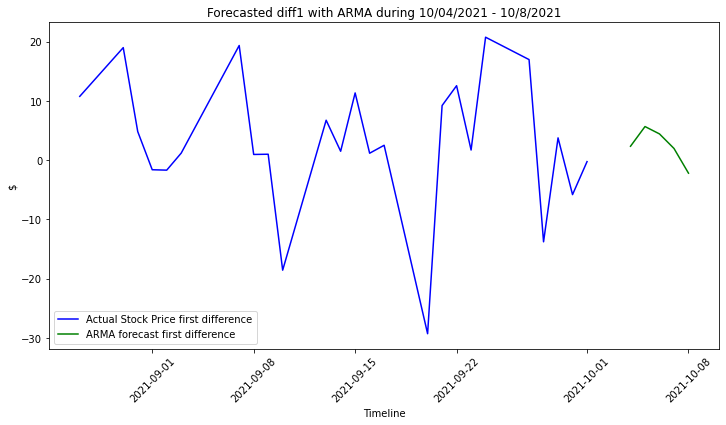

In [70]:
# Visualising the auto regression values

plt.figure(figsize=(12,6))
plt.plot(stock_price_diff1[-25:].index, stock_price_diff1[-25:],
        label='Actual Stock Price first difference', c='b')
plt.plot(arma_5_model_forecast.index, arma_5_model_forecast["Forecast_diff1"],
        label='ARMA forecast first difference', c='g')
plt.title('Forecasted diff1 with ARMA during 10/04/2021 - 10/8/2021')
plt.xlabel('Timeline')
plt.xticks(rotation=45)
plt.ylabel('$')
plt.legend()
plt.show()

Now, I am storing the forecasted stock price in the dataframe:

In [71]:
arma_5_model_forecast["Forecast"] = stock_forecast_price(arma_5_model_forecast["Forecast_diff1"],\
                                                         stock_close_price[-1])
arma_5_model_forecast

,Forecast_diff1,Forecast
2021-10-04,2.337462,777.557433
2021-10-05,5.663195,783.220628
2021-10-06,4.417165,787.637792
2021-10-07,1.962309,789.600101
2021-10-08,-2.210266,787.389835


Creating a visualisation to showcase the Tesla stock price for the upcoming week (10/4 - 10/8, 2021):

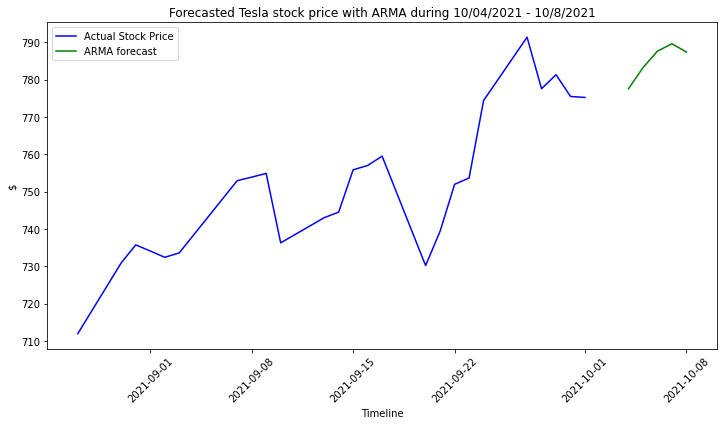

In [72]:
# Visualising the auto regression forecast

plt.figure(figsize=(12,6))
plt.plot(stock_close_price[-25:].index, stock_close_price[-25:],
        label='Actual Stock Price', c='b')
plt.plot(arma_5_model_forecast.index, arma_5_model_forecast["Forecast"],
        label='ARMA forecast', c='g')
plt.title('Forecasted Tesla stock price with ARMA during 10/04/2021 - 10/8/2021')
plt.xlabel('Timeline')
plt.xticks(rotation=45)
plt.ylabel('$')
plt.legend()
plt.show()

Here, in the above line plot, blue line indicates the actual stock price and green line indicates the forecasted stock price for 10/04 - 10/08, 2021 period.

The forecast by ARMA(5,4) indicates an increase in stock price in the upcoming week of Oct 1, 2021. 


<a id="arima"> </a>

## ARIMA modeling:

ARIMA model is an extension of ARMA model wherein the model identifies the best order of differentiation to transform non stationary data to stationary data ie., it utilises differentiation order, the auto regressive and moving average aspects to make forecast. Hence, I have to define three parameters - differentiation order, AR component order p and MA component order q.

In [73]:
#Importing the ARIMA model

from statsmodels.tsa.arima_model import ARIMA

In [74]:
p = range(6)
q = range(6)
d = range(3)
pdq=list(itertools.product(p,d,q))
pdq[:5]

[(0, 0, 0), (0, 0, 1), (0, 0, 2), (0, 0, 3), (0, 0, 4)]

In [75]:

arima_results_tsla=[] #arima AIC results
arima_results_tsla_parameters=[] #arima parameters
for param_set in pdq:
    try:
        arima_tsla=ARIMA(stock_close_price, order=param_set)
        arima_fitted_tsla = arima_tsla.fit()
        arima_results_tsla.append(arima_fitted_tsla.aic)
        arima_results_tsla_parameters.append(param_set)
        print('=='*30)
        print('ARIMA parameters are:{} & AIC value is:{}'.format(param_set,  arima_fitted_tsla.aic))
    except:
        continue

        
print('**'*30)
print('The Lowest AIC score is {:.4f} and the corresponding parameters are {}'.\
      format(min(arima_results_tsla),
             arima_results_tsla_parameters[arima_results_tsla.index(min(arima_results_tsla))]))

/Users/Monika/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:216: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/Users/Monika/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:216: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


ARIMA parameters are:(0, 0, 0) & AIC value is:29640.808988824716
ARIMA parameters are:(0, 0, 1) & AIC value is:26751.21807552697


/Users/Monika/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:216: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


ARIMA parameters are:(0, 0, 2) & AIC value is:24300.945314206427


/Users/Monika/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:216: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


ARIMA parameters are:(0, 0, 3) & AIC value is:22562.677377317123
ARIMA parameters are:(0, 1, 0) & AIC value is:15798.286306261594
ARIMA parameters are:(0, 1, 1) & AIC value is:15789.255664025837


/Users/Monika/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:216: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/Users/Monika/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:216: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/Users/Monika/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:216: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/Users/Monika/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:216: ValueWarnin

ARIMA parameters are:(0, 1, 2) & AIC value is:15791.039416101044


/Users/Monika/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:216: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/Users/Monika/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:216: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


ARIMA parameters are:(0, 1, 3) & AIC value is:15782.732308740095


/Users/Monika/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:216: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/Users/Monika/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:216: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


ARIMA parameters are:(0, 1, 4) & AIC value is:15784.697541612772


/Users/Monika/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:216: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/Users/Monika/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:216: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


ARIMA parameters are:(0, 1, 5) & AIC value is:15761.240789772011
ARIMA parameters are:(0, 2, 0) & AIC value is:17466.278942320685


/Users/Monika/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:216: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/Users/Monika/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:216: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/Users/Monika/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:216: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/Users/Monika/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:216: ValueWarnin

ARIMA parameters are:(0, 2, 1) & AIC value is:15796.990016519116


/Users/Monika/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:216: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/Users/Monika/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:216: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


ARIMA parameters are:(0, 2, 2) & AIC value is:15787.298102510633


/Users/Monika/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:216: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/Users/Monika/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:216: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


ARIMA parameters are:(0, 2, 3) & AIC value is:15788.990785162936


/Users/Monika/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:216: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/Users/Monika/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:216: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


ARIMA parameters are:(0, 2, 4) & AIC value is:15781.336911462433


/Users/Monika/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:216: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/Users/Monika/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:216: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


ARIMA parameters are:(0, 2, 5) & AIC value is:15783.328426914435
ARIMA parameters are:(1, 0, 0) & AIC value is:15818.130822838226


/Users/Monika/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:216: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/Users/Monika/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:216: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/Users/Monika/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:216: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/Users/Monika/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:216: ValueWarnin

ARIMA parameters are:(1, 1, 0) & AIC value is:15789.639113541052
ARIMA parameters are:(1, 1, 1) & AIC value is:15791.185759549604


/Users/Monika/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:216: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/Users/Monika/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:216: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


ARIMA parameters are:(1, 1, 2) & AIC value is:15791.75793896971


/Users/Monika/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:216: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/Users/Monika/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:216: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


ARIMA parameters are:(1, 1, 3) & AIC value is:15784.723498385429


/Users/Monika/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:216: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/Users/Monika/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:216: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


ARIMA parameters are:(1, 1, 4) & AIC value is:15774.309515274173


/Users/Monika/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:216: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/Users/Monika/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:216: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


ARIMA parameters are:(1, 1, 5) & AIC value is:15760.456968817063
ARIMA parameters are:(1, 2, 0) & AIC value is:16764.452529223337


/Users/Monika/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:216: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/Users/Monika/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:216: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/Users/Monika/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:216: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/Users/Monika/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:216: ValueWarnin

ARIMA parameters are:(1, 2, 1) & AIC value is:15787.7517399025


/Users/Monika/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:216: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/Users/Monika/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:216: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


ARIMA parameters are:(1, 2, 2) & AIC value is:15795.469105790497


/Users/Monika/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:216: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/Users/Monika/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:216: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/Users/Monika/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warn('Inverting hessian failed, no bse or cov_params '
/Users/Monika/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:216: ValueWarning: A date index has been provided, but it has no associated frequency in

ARIMA parameters are:(1, 2, 3) & AIC value is:15788.709617681661
ARIMA parameters are:(1, 2, 4) & AIC value is:15790.329247618514


/Users/Monika/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:216: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/Users/Monika/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:216: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/Users/Monika/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:216: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


ARIMA parameters are:(2, 0, 0) & AIC value is:15810.062748731409


/Users/Monika/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:216: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/Users/Monika/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:216: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/Users/Monika/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:216: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/Users/Monika/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:216: ValueWarnin

ARIMA parameters are:(2, 1, 0) & AIC value is:15790.268481126965
ARIMA parameters are:(2, 1, 1) & AIC value is:15790.430287844185


/Users/Monika/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:216: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/Users/Monika/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:216: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


ARIMA parameters are:(2, 1, 2) & AIC value is:15759.637733918222


/Users/Monika/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:216: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/Users/Monika/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:216: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


ARIMA parameters are:(2, 1, 3) & AIC value is:15775.35547991821


/Users/Monika/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:216: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/Users/Monika/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:216: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


ARIMA parameters are:(2, 1, 4) & AIC value is:15735.990487229392


/Users/Monika/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:216: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/Users/Monika/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:216: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


ARIMA parameters are:(2, 1, 5) & AIC value is:15762.444612047155
ARIMA parameters are:(2, 2, 0) & AIC value is:16375.431048394843


/Users/Monika/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:216: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/Users/Monika/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:216: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/Users/Monika/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:216: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/Users/Monika/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:216: ValueWarnin

ARIMA parameters are:(2, 2, 1) & AIC value is:15788.132072270111


/Users/Monika/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:216: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/Users/Monika/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:216: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/Users/Monika/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warn('Inverting hessian failed, no bse or cov_params '
/Users/Monika/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:216: ValueWarning: A date index has been provided, but it has no associated frequency in

ARIMA parameters are:(2, 2, 2) & AIC value is:15789.203537246705
ARIMA parameters are:(2, 2, 3) & AIC value is:15751.195154205392


/Users/Monika/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:216: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/Users/Monika/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:216: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/Users/Monika/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warn('Inverting hessian failed, no bse or cov_params '
/Users/Monika/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:216: ValueWarning: A date index has been provided, but it has no associated frequency in

ARIMA parameters are:(2, 2, 4) & AIC value is:15737.516767590134
ARIMA parameters are:(2, 2, 5) & AIC value is:15734.250953254947


/Users/Monika/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:216: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/Users/Monika/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/Users/Monika/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:216: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


ARIMA parameters are:(3, 0, 0) & AIC value is:15820.969244793112


/Users/Monika/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:216: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/Users/Monika/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:216: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/Users/Monika/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:216: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/Users/Monika/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:216: ValueWarnin

ARIMA parameters are:(3, 1, 0) & AIC value is:15781.98351136053
ARIMA parameters are:(3, 1, 1) & AIC value is:15783.52020685939


/Users/Monika/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:216: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/Users/Monika/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:216: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


ARIMA parameters are:(3, 1, 2) & AIC value is:15737.997839177657


/Users/Monika/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:216: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/Users/Monika/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:216: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/Users/Monika/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:216: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/Users/Monika/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:216: ValueWarnin

ARIMA parameters are:(3, 1, 4) & AIC value is:15736.30101662331


/Users/Monika/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:216: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/Users/Monika/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:216: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


ARIMA parameters are:(3, 1, 5) & AIC value is:15743.079522618787


/Users/Monika/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:216: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/Users/Monika/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:216: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


ARIMA parameters are:(3, 2, 0) & AIC value is:16222.995237383859


/Users/Monika/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:216: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/Users/Monika/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:216: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


ARIMA parameters are:(3, 2, 1) & AIC value is:15780.456988767284


/Users/Monika/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:216: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/Users/Monika/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:216: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/Users/Monika/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warn('Inverting hessian failed, no bse or cov_params '
/Users/Monika/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:216: ValueWarning: A date index has been provided, but it has no associated frequency in

ARIMA parameters are:(3, 2, 2) & AIC value is:15788.942892686895


/Users/Monika/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warn('Inverting hessian failed, no bse or cov_params '
/Users/Monika/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:216: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/Users/Monika/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:216: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


ARIMA parameters are:(3, 2, 3) & AIC value is:15735.834432589492
ARIMA parameters are:(3, 2, 4) & AIC value is:15737.277788610394


/Users/Monika/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:216: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/Users/Monika/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:216: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


ARIMA parameters are:(3, 2, 5) & AIC value is:15738.698060376919


/Users/Monika/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:216: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/Users/Monika/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warn('Inverting hessian failed, no bse or cov_params '
/Users/Monika/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/Users/Monika/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:216: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  w

ARIMA parameters are:(4, 0, 0) & AIC value is:15812.21924236157


/Users/Monika/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:216: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/Users/Monika/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:216: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/Users/Monika/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:216: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/Users/Monika/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:216: ValueWarnin

ARIMA parameters are:(4, 1, 0) & AIC value is:15782.242891836217


/Users/Monika/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:216: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/Users/Monika/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:216: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


ARIMA parameters are:(4, 1, 1) & AIC value is:15770.169924855061


/Users/Monika/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:216: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/Users/Monika/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:216: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


ARIMA parameters are:(4, 1, 2) & AIC value is:15738.529099232801


/Users/Monika/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:216: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/Users/Monika/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:216: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


ARIMA parameters are:(4, 1, 3) & AIC value is:15736.671784489048


/Users/Monika/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:216: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/Users/Monika/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:216: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


ARIMA parameters are:(4, 1, 4) & AIC value is:15728.387165485674


/Users/Monika/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:216: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/Users/Monika/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:216: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


ARIMA parameters are:(4, 1, 5) & AIC value is:15670.691801807097


/Users/Monika/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:216: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/Users/Monika/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:216: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


ARIMA parameters are:(4, 2, 0) & AIC value is:16201.255311108162


/Users/Monika/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:216: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/Users/Monika/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:216: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


ARIMA parameters are:(4, 2, 1) & AIC value is:15780.942736061239


/Users/Monika/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:216: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/Users/Monika/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:216: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


ARIMA parameters are:(4, 2, 2) & AIC value is:15768.938379945224


/Users/Monika/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:216: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/Users/Monika/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:216: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


ARIMA parameters are:(4, 2, 3) & AIC value is:15736.603750400089


/Users/Monika/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:216: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/Users/Monika/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:216: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/Users/Monika/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warn('Inverting hessian failed, no bse or cov_params '
/Users/Monika/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:216: ValueWarning: A date index has been provided, but it has no associated frequency in

ARIMA parameters are:(4, 2, 4) & AIC value is:15737.799442479381
ARIMA parameters are:(4, 2, 5) & AIC value is:15681.82402754281


/Users/Monika/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:216: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


ARIMA parameters are:(5, 0, 0) & AIC value is:15811.449567141819


/Users/Monika/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:216: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/Users/Monika/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:216: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/Users/Monika/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:216: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/Users/Monika/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:216: ValueWarnin

ARIMA parameters are:(5, 1, 0) & AIC value is:15762.758749168821


/Users/Monika/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:216: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/Users/Monika/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:216: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


ARIMA parameters are:(5, 1, 1) & AIC value is:15761.438886591877


/Users/Monika/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:216: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/Users/Monika/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:216: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


ARIMA parameters are:(5, 1, 2) & AIC value is:15763.415020851491


/Users/Monika/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:216: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/Users/Monika/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:216: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


ARIMA parameters are:(5, 1, 3) & AIC value is:15734.933898431591


/Users/Monika/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:216: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/Users/Monika/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:216: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


ARIMA parameters are:(5, 1, 4) & AIC value is:15668.880730558842


/Users/Monika/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:216: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/Users/Monika/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:216: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


ARIMA parameters are:(5, 1, 5) & AIC value is:15670.864166482297


/Users/Monika/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:216: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/Users/Monika/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:216: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


ARIMA parameters are:(5, 2, 0) & AIC value is:16100.55412903707


/Users/Monika/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:216: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/Users/Monika/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:216: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


ARIMA parameters are:(5, 2, 1) & AIC value is:15760.58048796037


/Users/Monika/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:216: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/Users/Monika/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:216: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


ARIMA parameters are:(5, 2, 2) & AIC value is:15759.495896106871


/Users/Monika/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:216: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/Users/Monika/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:216: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


ARIMA parameters are:(5, 2, 3) & AIC value is:15731.595278809029


/Users/Monika/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:216: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/Users/Monika/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:216: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


ARIMA parameters are:(5, 2, 4) & AIC value is:15739.328341720284


/Users/Monika/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:216: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/Users/Monika/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:216: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


ARIMA parameters are:(5, 2, 5) & AIC value is:15663.142831538196
************************************************************
The Lowest AIC score is 15663.1428 and the corresponding parameters are (5, 2, 5)


### Creating the best identified ARIMA model

Based on the above values, I am going to create a ARIMA model with the values of (5,2,5)
ie, AR of 5 and MA of order 5 with a second differentiation on the Tesla closing price

In [76]:
arima_tsla = ARIMA(stock_close_price,order=(5,2,5))
arima_fitted_tsla = arima_tsla.fit()

/Users/Monika/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:216: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/Users/Monika/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:216: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


In [77]:
arima_predictions_tsla = arima_fitted_tsla.predict(start=len(stock_close_price[:-25]), 
                                   end=len(stock_close_price[:-25])+len(stock_close_price[-25:])-1,dynamic=False)

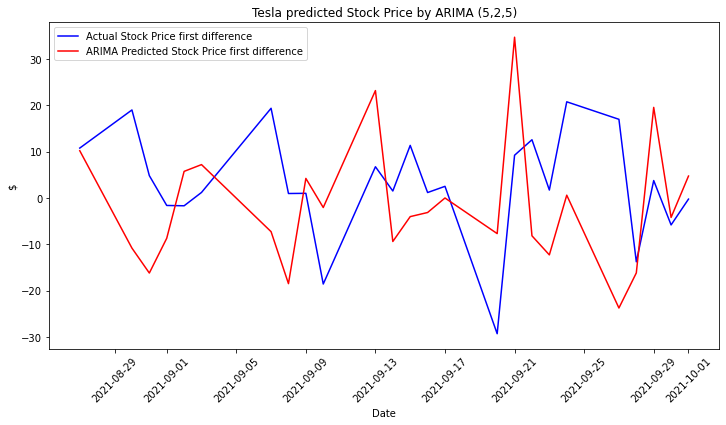

In [78]:
plt.figure(figsize = (12,6))
plt.plot(stock_price_diff1[-25:], label='Actual Stock Price first difference',c='b')
plt.plot(arima_predictions_tsla,c='r',label='ARIMA Predicted Stock Price first difference')
plt.title('Tesla predicted Stock Price by ARIMA (5,2,5)')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.ylabel('$')
plt.legend()
plt.show()

From the above visual, on comparing the predicted and actual values, I noticed that the ARIMA model is capturing the fluctuations in data

I am creating a data frame to compare the prediction and the actual values, and calculate the model performance metrics

In [79]:
arima_5_model_test_results = pd.concat([stock_price_diff1[-25:],arima_predictions_tsla[-25:]],axis=1).dropna()
arima_5_model_test_results.columns = ["Actual","Predicted"]

arima_5_model_test_results.head()

,Actual,Predicted
Date,,
2021-08-27,10.760010,10.189138
2021-08-30,18.989990,-10.835681
2021-08-31,4.809998,-16.219266
2021-09-01,-1.629944,-8.715764
2021-09-02,-1.700012,5.728610


In [80]:
arima_5_model_test_results.tail()

,Actual,Predicted
Date,,
2021-09-27,16.969971,-23.768490
2021-09-28,-13.799988,-16.193098
2021-09-29,3.750000,19.544254
2021-09-30,-5.830017,-4.211511
2021-10-01,-0.260010,4.717394


In [81]:
arima_5_model_test_results["Difference"] = arima_5_model_test_results[["Actual", "Predicted"]].apply(lambda x: x[0] - x[1],axis=1)
arima_5_model_test_results

,Actual,Predicted,Difference
Date,,,
2021-08-27,10.760010,10.189138,0.570872
2021-08-30,18.989990,-10.835681,29.825671
2021-08-31,4.809998,-16.219266,21.029264
2021-09-01,-1.629944,-8.715764,7.085821
2021-09-02,-1.700012,5.728610,-7.428622
2021-09-03,1.179993,7.189242,-6.009250
2021-09-07,19.349976,-7.289540,26.639516
2021-09-08,0.950012,-18.510077,19.460090
2021-09-09,0.989990,4.208279,-3.218289


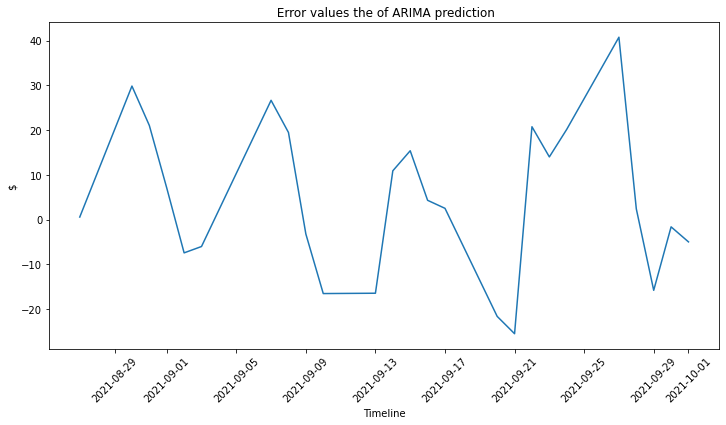

In [82]:
# Generating a line plot to understand the error term behaviour
plt.figure(figsize=(12,6))
plt.plot(arima_5_model_test_results["Difference"])
plt.title(' Error values the of ARIMA prediction')
plt.xlabel('Timeline')
plt.xticks(rotation=45)
plt.ylabel('$')
plt.show()

Noticed that the error term follows Random walk with mean varying around zero

To calculate the mean absolute error, root mean squared error I am utilising the functions from sklearn package

In [83]:
#Importing functions to calculate error
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [84]:
arima_mae = mean_absolute_error(arima_5_model_test_results["Actual"],arima_5_model_test_results["Predicted"])
print("ARIMA model - Mean absolute error: ", round(arima_mae,2))

arima_rmse = np.sqrt(mean_squared_error(arima_5_model_test_results["Actual"],arima_5_model_test_results["Predicted"]))
print("ARIMA model - Root mean squared error: ", round(arima_rmse,2))

ARIMA model - Mean absolute error:  14.19
ARIMA model - Root mean squared error:  17.42


### Forecasting the Tesla stock price during Oct 4, 2021 - Oct, 8 2021 via ARIMA:

Now, I am forecasting for an additional five days after October 1, 2021

Creating a dataframe to store the forecasted Tesla stock price:

In [85]:
arima_5_model_forecast = arima_fitted_tsla.predict(start=len(stock_price_diff1[:-25]), 
                                   end=len(stock_price_diff1[:-25])+
                                              len(stock_price_diff1[-25:])-1+5,dynamic=False)

arima_5_model_forecast = pd.DataFrame(arima_5_model_forecast[-5:])
arima_5_model_forecast.index = index_5[-5:]


arima_5_model_forecast.columns = ["Forecast_diff1"]
arima_5_model_forecast

/Users/Monika/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:580: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


,Forecast_diff1
2021-10-04,4.717394
2021-10-05,0.980629
2021-10-06,2.692246
2021-10-07,-0.721723
2021-10-08,-9.672852


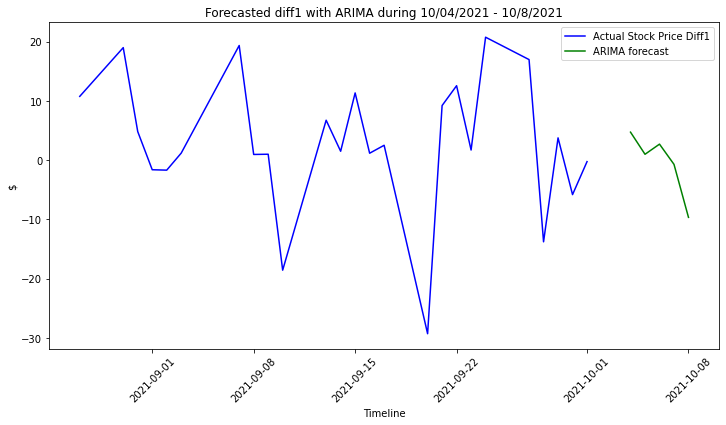

In [86]:
# Visualising the auto regression values

plt.figure(figsize=(12,6))
plt.plot(stock_price_diff1[-25:].index, stock_price_diff1[-25:],
        label='Actual Stock Price Diff1', c='b')
plt.plot(arima_5_model_forecast.index, arima_5_model_forecast["Forecast_diff1"],
        label='ARIMA forecast', c='g')
plt.title('Forecasted diff1 with ARIMA during 10/04/2021 - 10/8/2021')
plt.xlabel('Timeline')
plt.xticks(rotation=45)
plt.ylabel('$')
plt.legend()
plt.show()

Now, I am storing the forecasted stock price in the dataframe:

In [87]:
arima_5_model_forecast["Forecast"] = stock_forecast_price(arima_5_model_forecast["Forecast_diff1"],\
                                                         stock_close_price[-1])
arima_5_model_forecast

,Forecast_diff1,Forecast
2021-10-04,4.717394,779.937365
2021-10-05,0.980629,780.917994
2021-10-06,2.692246,783.610240
2021-10-07,-0.721723,782.888516
2021-10-08,-9.672852,773.215665


Creating a visualisation to showcase the Tesla stock price for the upcoming week (10/4 - 10/8, 2021):

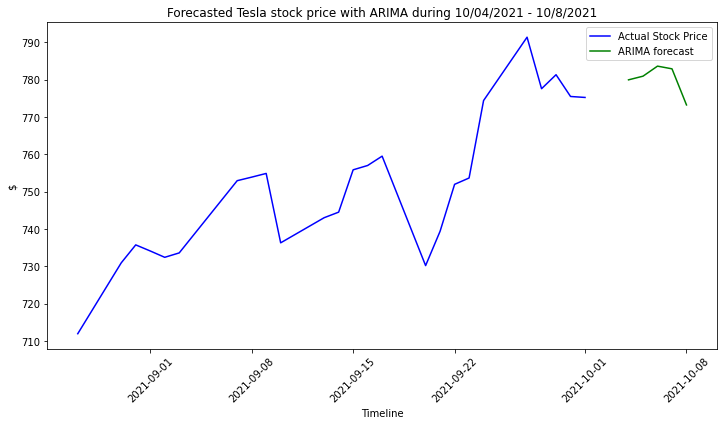

In [88]:
# Visualising the auto regression forecast

plt.figure(figsize=(12,6))
plt.plot(stock_close_price[-25:].index, stock_close_price[-25:],
        label='Actual Stock Price', c='b')
plt.plot(arima_5_model_forecast.index, arima_5_model_forecast["Forecast"],
        label='ARIMA forecast', c='g')
plt.title('Forecasted Tesla stock price with ARIMA during 10/04/2021 - 10/8/2021')
plt.xlabel('Timeline')
plt.xticks(rotation=45)
plt.ylabel('$')
plt.legend()
plt.show()

Here, in the above line plot, blue line indicates the actual stock price and green line indicates the forecasted stock price for 10/04 - 10/08, 2021 period.

The forecast by ARIMA(5,2,5) indicates a slight increase followed by steep drop in stock price in the upcoming week of Oct 1, 2021. 


<a id="sarima"> </a>

## SARIMA modeling
Seasonal ARIMA captures the seasonal aspects along with the moving average, auto regression, differentiation terms

With an aim to understand if the data consists of seasonality, I am going to perform seasonal decompose with the help of statsmodels python library.

Here, I am considering the period as 252 as a year consists of ~252 business days

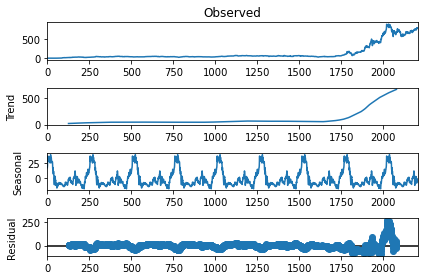

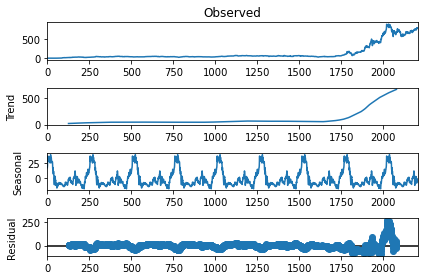

In [90]:
import statsmodels
x=(statsmodels.tsa.seasonal.seasonal_decompose(stock_close_price.values,period=252))
x.plot()

From the above seasonal line graph, it is clear that there is no seasonality within a year period.

Additionally, I am downloading the monhly closing price of Tesla stock, to analyse and capture the seasonal affect in the time series modelling. Here, I use yahoo Finance to download the monthly closing price by passing the interval parameter as one month

In [91]:
stock_close_price_monthly = yf.download(tickers = stock_ticker, 
                                        start = start_date, end = end_date, interval = '1mo')['Close']
stock_close_price_monthly = stock_close_price_monthly.dropna()

[*********************100%***********************]  1 of 1 completed


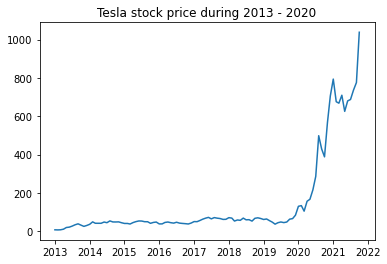

In [92]:
plt.plot(stock_close_price_monthly)
plt.title("Tesla stock price during 2013 - 2020")
plt.show()

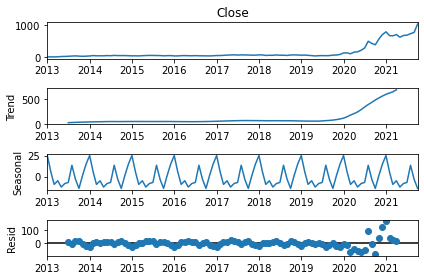

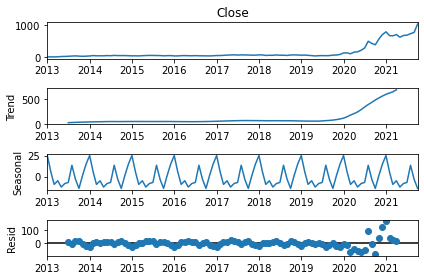

In [93]:
import statsmodels
x=(statsmodels.tsa.seasonal.seasonal_decompose(stock_close_price_monthly))
x.plot()

From the above seasonal line graph, it is clear that there is no seasonality within a year period which confirms with the daily stock price data.

In [94]:
#Importing the auto_arima model

from pmdarima.arima import auto_arima

In [95]:
auto_arima_fitted_tsla=auto_arima(stock_close_price,d=1,D=1,m=1,error_action='ignore',suppress_warnings=True,
                            stepwise=True,seasonal=False,n_jobs=-1,random_state=20,random=True,with_intercept=True)

In [96]:
auto_arima_fitted_tsla.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 2204
Model:               SARIMAX(2, 1, 4)   Log Likelihood               -7859.995
Date:                Thu, 28 Oct 2021   AIC                          15735.991
Time:                        13:27:41   BIC                          15781.571
Sample:                             0   HQIC                         15752.645
                               - 2204                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      1.0585      0.548      1.930      0.054      -0.016       2.133
ar.L1         -1.0890      0.009   -121.154      0.000      -1.107      -1.071
ar.L2         -0.9276      0.008   -113.427      0.000      -0.944      -0.912
ma.L1          1.0292      0.011     95.803      0.000       1.008       1.050
ma.L2          0.8655      0.011     79.018      0.000       0.844       0.887
ma.L3         -0.0439      0.009     -4.682      0.000      -0.062      -0.026
ma.L4          0.0623      0.008      8.155      0.000       0.047       0.077
sigma2        73.4999      0.595    123.619      0.000      72.335      74.665
===================================================================================
Ljung-Box (Q):                      295.49   Jarque-Bera (JB):             78658.57
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):             148.06   Skew:                             0.69
Prob(H) (two-sided):                  0.00   Kurtosis:                        32.24
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [97]:
prediction_sarima_tsla=auto_arima_fitted_tsla.predict(n_periods=25)

In [98]:
prediction_sarima_tsla=pd.DataFrame(prediction_sarima_tsla)
prediction_sarima_tsla.index=stock_close_price[-25:].index

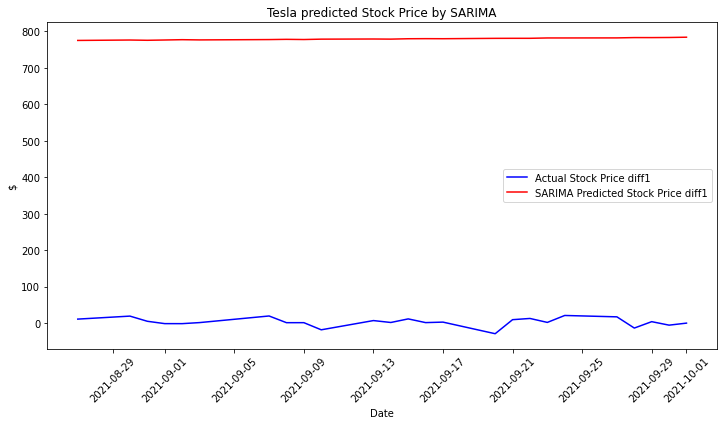

In [99]:
plt.figure(figsize = (12,6))
plt.plot(stock_price_diff1[-25:], label='Actual Stock Price diff1',c='b')
plt.plot(prediction_sarima_tsla,c='r',label='SARIMA Predicted Stock Price diff1')
plt.title('Tesla predicted Stock Price by SARIMA')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.ylabel('$')
plt.legend()
plt.show()

From the above visual, it is clear that SARIMA model is not capturing the fluctuations in data. Hence, I stop my analysis with SARIMA model

<a id="prophet"> </a>

## Prophet based time series modelling: 


The Prophet library is an open-source library designed for making forecasts for univariate time series datasets. Prophet implements a additive time series forecasting model which supports trends, seasonality and holidays.



In [4]:
#Installing the prophet package
conda install -c conda-forge prophet

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.10.1
  latest version: 4.10.3

Please update conda by running

    $ conda update -n base -c defaults conda



## Package Plan ##

  environment location: /Users/Monika/opt/anaconda3

  added / updated specs:
    - prophet


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    ca-certificates-2021.10.8  |       h033912b_0         139 KB  conda-forge
    certifi-2021.10.8          |   py38h50d1736_0         145 KB  conda-forge
    conda-4.10.3               |   py38h50d1736_2         3.1 MB  conda-forge
    openssl-1.1.1l             |       h0d85af4_0         1.9 MB  conda-forge
    prophet-1.0.1              |   py38h6c79ece_3         651 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         5.9 MB

The followi

In [100]:
#Importing Prophet model from prophet package
from prophet import Prophet

As the Prophet model expects data in the format as a dataframe with two columns: ds and y, I am creating a data frame with the columns ds and y.

Here, the ds (datestamp) column should in the formats either YYYY-MM-DD for date or YYYY-MM-DD HH:MM:SS for a timestamp. The y column must be numeric, that represents the measurement that needs to be forecasted

In [101]:
prophet_df = stock_close_price.reset_index()

In [102]:
prophet_df.columns = ["ds","y"]
prophet_df.head()

,ds,y
0,2013-01-02,7.072
1,2013-01-03,6.954
2,2013-01-04,6.880
3,2013-01-07,6.868
4,2013-01-08,6.736


In [103]:
prophet_model_tsla = Prophet()
prophet_model_tsla.fit(prophet_df)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


### Predictions based on the Prophet model:

In [106]:
future = prophet_model_tsla.make_future_dataframe(periods=0)
future = future[-25:]
future

,ds
2179,2021-08-27
2180,2021-08-30
2181,2021-08-31
2182,2021-09-01
2183,2021-09-02
2184,2021-09-03
2185,2021-09-07
2186,2021-09-08
2187,2021-09-09
2188,2021-09-10


In [107]:
forecast = prophet_model_tsla.predict(future)

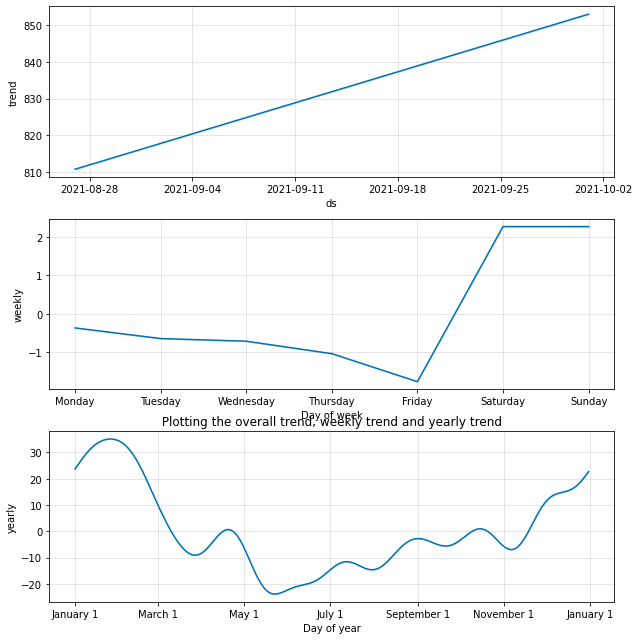

In [108]:
fig2 = prophet_model_tsla.plot_components(forecast,weekly_start=1)
plt.title(" Plotting the overall trend, weekly trend and yearly trend ")
plt.show()

Noticed that there is an overall upward trend with hude steep since 2020.

On a weekly basis, the stock has adownward trend with least on Friday

On a yearly basis, the stock price has a dip during the months March - July

In [109]:
prophet_predictions_tsla = pd.DataFrame(prophet_model_tsla.predict(future))[["ds","yhat"]]
prophet_predictions_tsla
prophet_predictions_tsla.set_index("ds", inplace=True)
prophet_predictions_tsla.tail()

,yhat
ds,
2021-09-27,843.073163
2021-09-28,844.289072
2021-09-29,845.747809
2021-09-30,846.981781
2021-10-01,847.835515


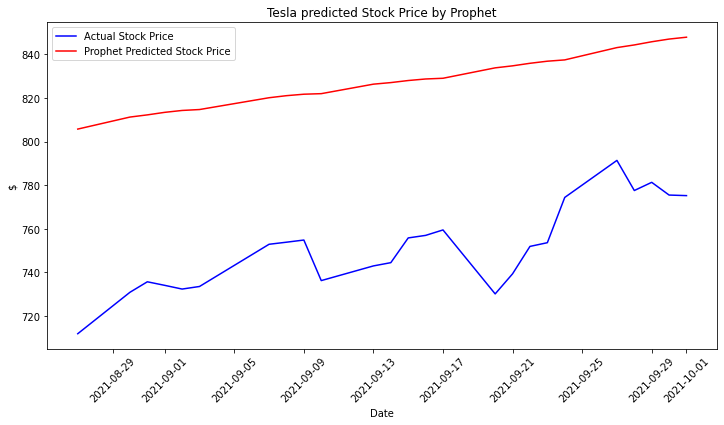

In [111]:
plt.figure(figsize = (12,6))
plt.plot(stock_close_price[-25:], label='Actual Stock Price',c='b')
plt.plot(prophet_predictions_tsla,c='r',label='Prophet Predicted Stock Price')
plt.title('Tesla predicted Stock Price by Prophet')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.ylabel('$')
plt.legend()
plt.show()

From the above visual, on comparing the predicted and actual values, I noticed that the Prophet model highly off from the actual values

I am creating a data frame to compare the prediction and the actual values, and calculate the model performance metrics

In [112]:
prophet_model_test_results = pd.concat([stock_close_price[-25:],prophet_predictions_tsla[-25:]],axis=1).dropna()
prophet_model_test_results.columns = ["Actual","Predicted"]

prophet_model_test_results.head()

,Actual,Predicted
2021-08-27,711.919983,805.719757
2021-08-30,730.909973,811.229595
2021-08-31,735.719971,812.229395
2021-09-01,734.090027,813.392993
2021-09-02,732.390015,814.259057


In [113]:
prophet_model_test_results.tail()

,Actual,Predicted
2021-09-27,791.359985,843.073163
2021-09-28,777.559998,844.289072
2021-09-29,781.309998,845.747809
2021-09-30,775.479980,846.981781
2021-10-01,775.219971,847.835515


In [114]:
prophet_model_test_results["Difference"] = prophet_model_test_results[["Actual", "Predicted"]]\
                                                .apply(lambda x: x[0] - x[1],axis=1)
prophet_model_test_results.head()

,Actual,Predicted,Difference
2021-08-27,711.919983,805.719757,-93.799774
2021-08-30,730.909973,811.229595,-80.319622
2021-08-31,735.719971,812.229395,-76.509424
2021-09-01,734.090027,813.392993,-79.302966
2021-09-02,732.390015,814.259057,-81.869042


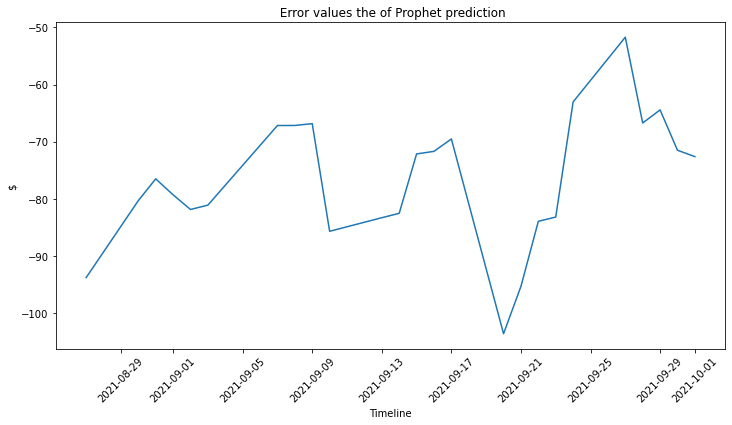

In [115]:
# Generating a line plot to understand the error term behaviour
plt.figure(figsize=(12,6))
plt.plot(prophet_model_test_results["Difference"])
plt.title(' Error values the of Prophet prediction')
plt.xlabel('Timeline')
plt.xticks(rotation=45)
plt.ylabel('$')
plt.show()

Noticed that the error term doesn't follows Random walk with mean varying around zero. Hence, the Prophet model is not a good model model for forecasting the stock price

To calculate the mean absolute error, root mean squared error I am utilising the functions from sklearn package

In [116]:
#Importing functions to calculate error
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [117]:
prophet_mae = mean_absolute_error(prophet_model_test_results["Actual"],prophet_model_test_results["Predicted"])
print("Prophet model - Mean absolute error: ", round(prophet_mae,2))

prophet_rmse = np.sqrt(mean_squared_error(prophet_model_test_results["Actual"],prophet_model_test_results["Predicted"]))
print("Prophet model - Root mean squared error: ", round(prophet_rmse,2))

Prophet model - Mean absolute error:  76.6
Prophet model - Root mean squared error:  77.43


As the model is not performing well, creating another model by modifying the model hyper parameters

In [118]:
prophet_model_tsla_2 = Prophet(changepoint_range=1, changepoint_prior_scale=0.75, weekly_seasonality=False)
prophet_model_tsla_2.fit(prophet_df)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


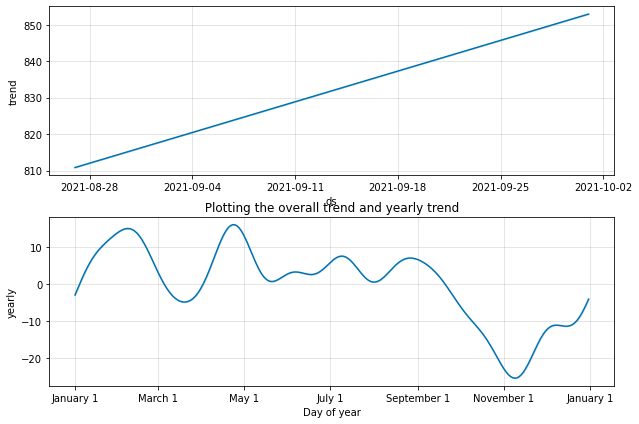

In [119]:
fig2 = prophet_model_tsla_2.plot_components(forecast,weekly_start=1)
plt.title(" Plotting the overall trend and yearly trend ")
plt.show()

### Predictions based on the Prophet model:

In [120]:
future = prophet_model_tsla_2.make_future_dataframe(periods=0)
future = future[-25:]
future

,ds
2179,2021-08-27
2180,2021-08-30
2181,2021-08-31
2182,2021-09-01
2183,2021-09-02
2184,2021-09-03
2185,2021-09-07
2186,2021-09-08
2187,2021-09-09
2188,2021-09-10


In [121]:
prophet_predictions_tsla = pd.DataFrame(prophet_model_tsla_2.predict(future))[["ds","yhat"]]
prophet_predictions_tsla
prophet_predictions_tsla.set_index("ds", inplace=True)
prophet_predictions_tsla.tail()

,yhat
ds,
2021-09-27,754.023576
2021-09-28,754.728071
2021-09-29,755.438855
2021-09-30,756.158327
2021-10-01,756.888535


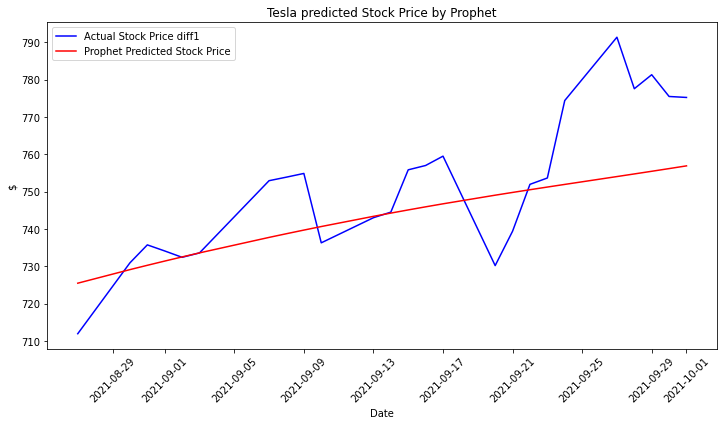

In [122]:
plt.figure(figsize = (12,6))
plt.plot(stock_close_price[-25:], label='Actual Stock Price diff1',c='b')
plt.plot(prophet_predictions_tsla,c='r',label='Prophet Predicted Stock Price')
plt.title('Tesla predicted Stock Price by Prophet')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.ylabel('$')
plt.legend()
plt.show()

From the above visual, on comparing the predicted and actual values, I noticed that the Prophet model highly off from the actual values

I am creating a data frame to compare the prediction and the actual values, and calculate the model performance metrics

In [123]:
prophet_model_test_results = pd.concat([stock_close_price[-25:],prophet_predictions_tsla[-25:]],axis=1).dropna()
prophet_model_test_results.columns = ["Actual","Predicted"]

prophet_model_test_results.head()

,Actual,Predicted
2021-08-27,711.919983,725.455906
2021-08-30,730.909973,729.093321
2021-08-31,735.719971,730.250017
2021-09-01,734.090027,731.381868
2021-09-02,732.390015,732.490485


In [124]:
prophet_model_test_results.tail()

,Actual,Predicted
2021-09-27,791.359985,754.023576
2021-09-28,777.559998,754.728071
2021-09-29,781.309998,755.438855
2021-09-30,775.479980,756.158327
2021-10-01,775.219971,756.888535


In [125]:
prophet_model_test_results["Difference"] = prophet_model_test_results[["Actual", "Predicted"]]\
                                                .apply(lambda x: x[0] - x[1],axis=1)
prophet_model_test_results.head()

,Actual,Predicted,Difference
2021-08-27,711.919983,725.455906,-13.535923
2021-08-30,730.909973,729.093321,1.816652
2021-08-31,735.719971,730.250017,5.469954
2021-09-01,734.090027,731.381868,2.708159
2021-09-02,732.390015,732.490485,-0.100470


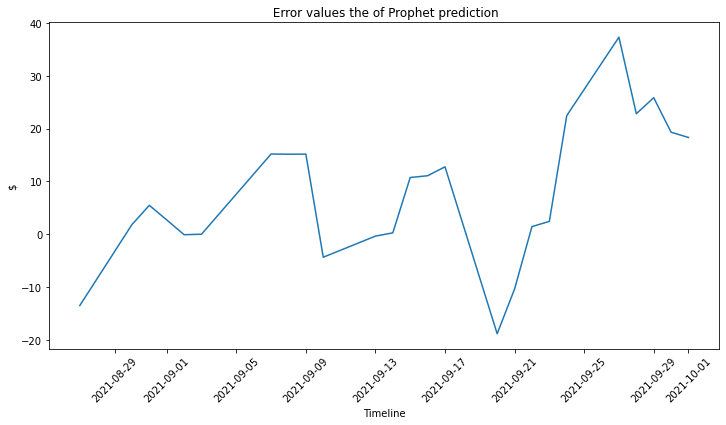

In [126]:
# Generating a line plot to understand the error term behaviour
plt.figure(figsize=(12,6))
plt.plot(prophet_model_test_results["Difference"])
plt.title(' Error values the of Prophet prediction')
plt.xlabel('Timeline')
plt.xticks(rotation=45)
plt.ylabel('$')
plt.show()

Noticed that the error term follows a better Random walk with mean varying around zero. Hence, the second prophet model is a better model for forecasting the stock price than the initial prophet model

In [129]:
from prophet.plot import add_changepoints_to_plot

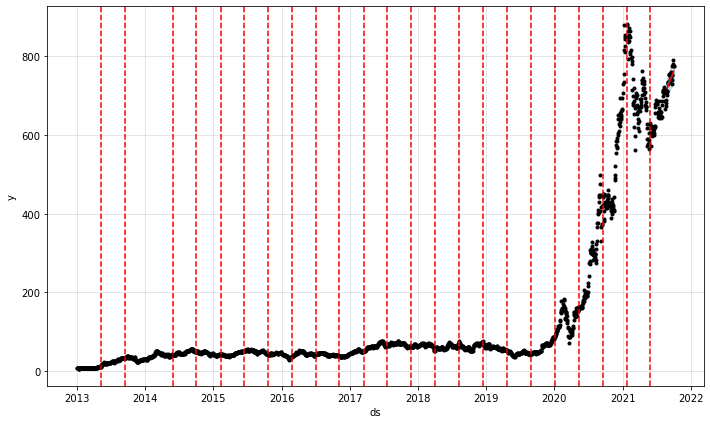

In [130]:
# Visualising the change points
fig = prophet_model_tsla_2.plot(prophet_model_tsla_2.predict(future))
a = add_changepoints_to_plot(fig.gca(),prophet_model_tsla_2,prophet_model_tsla_2.predict(future))
fig;

To calculate the mean absolute error, root mean squared error I am utilising the functions from sklearn package

In [131]:
#Importing functions to calculate error
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [132]:
prophet2_mae = mean_absolute_error(prophet_model_test_results["Actual"],prophet_model_test_results["Predicted"])
print("Prophet_2 model - Mean absolute error: ", round(prophet2_mae,2))

prophet2_rmse = np.sqrt(mean_squared_error(prophet_model_test_results["Actual"],prophet_model_test_results["Predicted"]))
print("Prophet_2 model - Root mean squared error: ", round(prophet2_rmse,2))

Prophet_2 model - Mean absolute error:  11.52
Prophet_2 model - Root mean squared error:  14.97


### Forecasting the Tesla stock price during Oct 4, 2021 - Oct, 8 2021 via Prophet:

Now, I am forecasting for an additional five days after October 1, 2021

Creating a dataframe to store the forecasted Tesla stock price:

In [133]:
future = prophet_model_tsla.make_future_dataframe(periods=7)
future = future.drop([2204,2205]) #dropping the weekend dates
future[-10:]

,ds
2199,2021-09-27
2200,2021-09-28
2201,2021-09-29
2202,2021-09-30
2203,2021-10-01
2206,2021-10-04
2207,2021-10-05
2208,2021-10-06
2209,2021-10-07
2210,2021-10-08


In [134]:
prophet_model_tsla_forecast = prophet_model_tsla_2.predict(future[-5:])
prophet_model_tsla_forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]
prophet_model_tsla_forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2021-10-04,766.601496,733.493172,785.692529,766.601496,766.601496,-7.444299,-7.444299,-7.444299,-7.444299,-7.444299,-7.444299,0.0,0.0,0.0,759.157197
1,2021-10-05,767.870782,734.238853,785.760008,767.870782,767.870782,-7.929501,-7.929501,-7.929501,-7.929501,-7.929501,-7.929501,0.0,0.0,0.0,759.941282
2,2021-10-06,769.140069,735.228251,787.582670,769.140069,769.140069,-8.401319,-8.401319,-8.401319,-8.401319,-8.401319,-8.401319,0.0,0.0,0.0,760.738750
3,2021-10-07,770.409356,735.959638,787.094254,770.409356,770.409356,-8.860991,-8.860991,-8.860991,-8.860991,-8.860991,-8.860991,0.0,0.0,0.0,761.548364
4,2021-10-08,771.678642,734.605153,788.518541,771.678642,771.678642,-9.310341,-9.310341,-9.310341,-9.310341,-9.310341,-9.310341,0.0,0.0,0.0,762.368302


Creating a visualisation to showcase the Tesla stock price for the upcoming week (10/4 - 10/8, 2021):

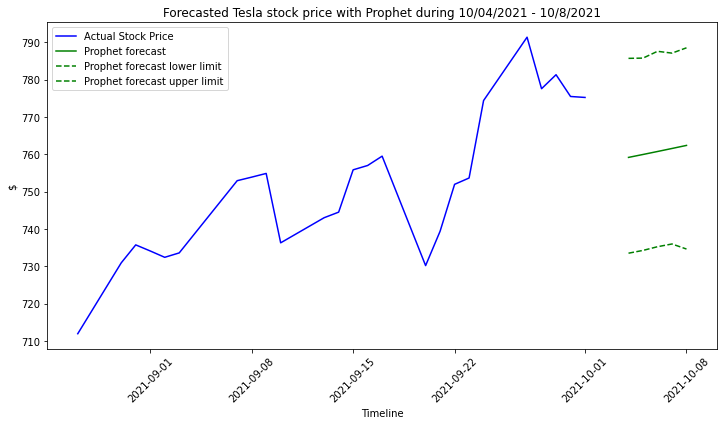

In [135]:
# Visualising the auto regression forecast

plt.figure(figsize=(12,6))
plt.plot(stock_close_price[-25:].index, stock_close_price[-25:],
        label='Actual Stock Price', c='b')
plt.plot(prophet_model_tsla_forecast["ds"], prophet_model_tsla_forecast["yhat"],
        label='Prophet forecast', c='g')
plt.plot(prophet_model_tsla_forecast["ds"], prophet_model_tsla_forecast["yhat_lower"],"--",
        label='Prophet forecast lower limit', c='g')
plt.plot(prophet_model_tsla_forecast["ds"], prophet_model_tsla_forecast["yhat_upper"],"--",
        label='Prophet forecast upper limit', c='g')
plt.title('Forecasted Tesla stock price with Prophet during 10/04/2021 - 10/8/2021')
plt.xlabel('Timeline')
plt.xticks(rotation=45)
plt.ylabel('$')
plt.legend()
plt.show()

Here, in the above line plot, blue line indicates the actual stock price and green line indicates the forecasted stock price for 10/04 - 10/08, 2021 period. The dotted green lines are the lower and upper bounds of the Prophet model forecast.

The forecast by Prophet model indicates a slight increase of stock price in the upcoming week of Oct 1, 2021. 



## Model comparison

In [136]:
mae = pd.DataFrame({ "ma": [ma_mae], "ar": [ar_mae], "arma": [arma_mae], "arima": [arima_mae], "prophet": [prophet2_mae]},index=["mae"])
rmse = { "ma": ma_rmse, "ar": ar_rmse, "arma": arma_rmse, "arima": arima_rmse, "prophet": prophet2_rmse}

In [137]:
mae

,ma,ar,arma,arima,prophet
mae,8.312795,8.999547,9.283188,14.194439,11.521184


In [138]:
model_compare = pd.DataFrame(data = { "Mean absolute error":[ma_mae, ar_mae, arma_mae, arima_mae, prophet2_mae],\
              "Root mean sqr error":[ma_rmse, ar_rmse, arma_rmse, arima_rmse, prophet2_rmse]},
             index= ["Moving average", "Auto Regressive","AR_MA", "ARIMA","Prophet"] )


In [139]:
model_compare

,Mean absolute error,Root mean sqr error
Moving average,8.312795,10.980146
Auto Regressive,8.999547,12.087183
AR_MA,9.283188,11.975149
ARIMA,14.194439,17.421203
Prophet,11.521184,14.974474


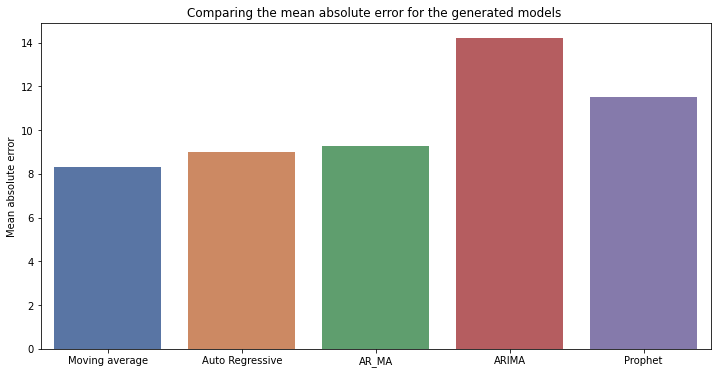

In [140]:
plt.figure(figsize=(12,6))
sns.barplot(y=model_compare["Mean absolute error"], x =model_compare.index,palette = "deep")
plt.title("Comparing the mean absolute error for the generated models ")
plt.show()

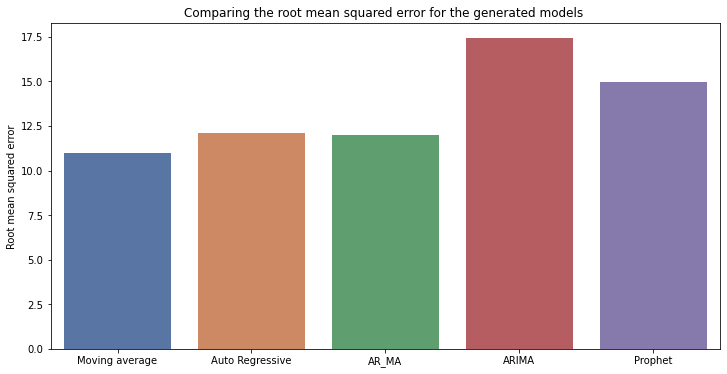

In [141]:
plt.figure(figsize=(12,6))
sns.barplot(y=model_compare["Root mean sqr error"], x =model_compare.index,palette = "deep")
plt.title("Comparing the root mean squared error for the generated models ")
plt.ylabel("Root mean squared error")
plt.show()

On comparing the error, I conclude that the ARIMA has the most error followed by Prophet model. The reason for the most error observed in ARIMA can be explained as ARIMA preferred a second differentiation on the closing price based on least AIC property, even though first differenced data is acheiving the required stationarity property.

The least error is by the moving average model. AR, ARMA models share similar error range which is slighlty higher than MA error.

As the stock market is not easily predictable, I strongly beleive that employing a time series based analysis can be a great tool for investors. Expecially, for the Tesla stock with the most recent average value of $\$750 $, forecasting a value with an error margin of 1.6\% is a good predictive model!

### References:

* Professor class notes
* https://facebook.github.io/prophet/
* https://machinelearningmastery.com/time-series-forecasting-with-prophet-in-python/
* https://www.analyticsvidhya.com/blog/2018/08/auto-arima-time-series-modeling-python-r/
* https://towardsdatascience.com/significance-of-acf-and-pacf-plots-in-time-series-analysis-2fa11a5d10a8
* https://towardsdatascience.com/arima-vs-prophet-forecasting-air-passenger-numbers-4e01b2d93608
